<a href="https://colab.research.google.com/github/dralvima/IITmethods/blob/main/3BodyProblem_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THIS IS TO COMPUTE TIMESERIES FOR BOTH A 2 BODY AND A 3 BODY SOLAR SYSTEM:**

https://towardsdatascience.com/modelling-the-three-body-problem-in-classical-mechanics-using-python-9dc270ad7767

In [1]:
#Import scipy
import scipy as sci
#Import matplotlib and associated modules for 3D and animations
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2
#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri
#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

#Define masses
m1=1.1 #Alpha Centauri A
m2=0.907 #Alpha Centauri B
#Define initial position vectors
r1=[-0.5,0,0] #m
r2=[0.5,0,0] #m
#Convert pos vectors to arrays
r1=numpy.array(r1,dtype="float64")
r2=numpy.array(r2,dtype="float64")#Find Centre of Mass
r_com=(m1*r1+m2*r2)/(m1+m2)#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s
#Convert velocity vectors to arrays
v1=numpy.array(v1,dtype="float64")
v2=numpy.array(v2,dtype="float64")
#Find velocity of COM
v_com=(m1*v1+m2*v2)/(m1+m2)

#A function defining the equations of motion
def TwoBodyEquations(w,t,G,m1,m2):
    r1=w[:3]
    r2=w[3:6]
    v1=w[6:9]
    v2=w[9:12]

    r=sci.linalg.norm(r2-r1) #Calculate magnitude or norm of vector

    dv1bydt=K1*m2*(r2-r1)/r**3
    dv2bydt=K1*m1*(r1-r2)/r**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2

    r_derivs=numpy.concatenate((dr1bydt,dr2bydt))
    derivs=numpy.concatenate((r_derivs,dv1bydt,dv2bydt))
    return derivs

#Package initial parameters
init_params=numpy.array([r1,r2,v1,v2]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=numpy.linspace(0,8,500) #8 orbital periods and 500 points

#Run the ODE solver
import scipy.integrate

two_body_sol=scipy.integrate.odeint(TwoBodyEquations,init_params,time_span,args=(G,m1,m2))

r1_sol=two_body_sol[:,:3]
r2_sol=two_body_sol[:,3:6]

PLOT SNAPSHOT OF 2-BODY ORBITS

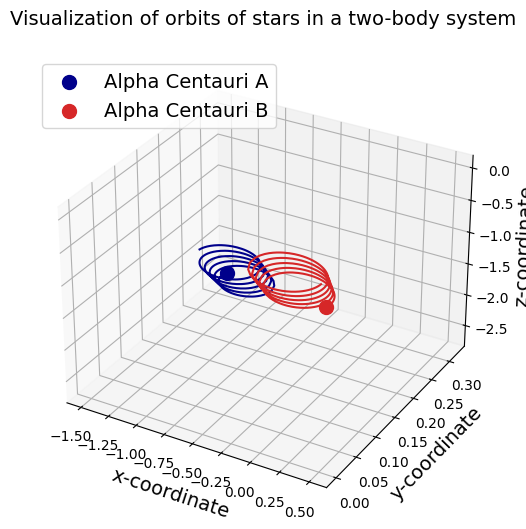

In [2]:
#Create figure
fig=plt.figure(figsize=(6,6))

#Create 3D axes
ax=fig.add_subplot(111,projection="3d")

#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")

#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")

#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

Note the lateral shift -> the center of mass between these stars is not balanced

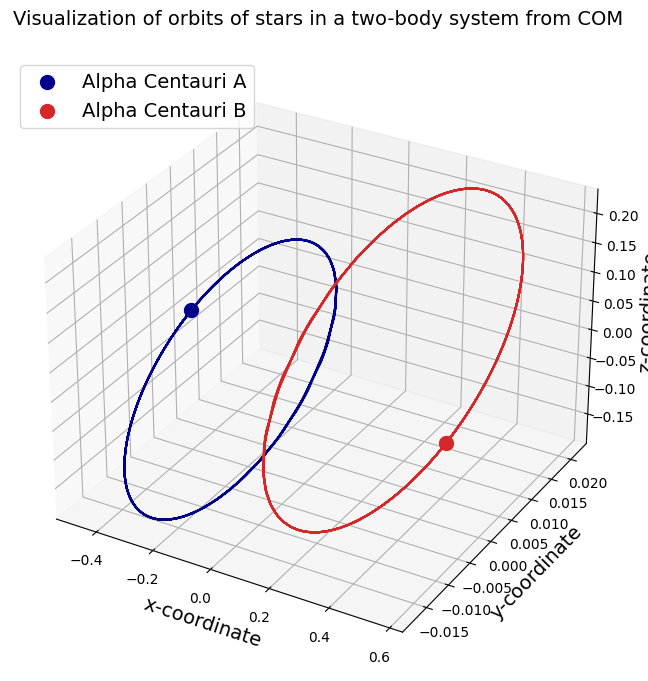

In [3]:
#Find location of COM
rcom_sol=(m1*r1_sol+m2*r2_sol)/(m1+m2)

#Find location of Alpha Centauri A w.r.t COM
r1com_sol=r1_sol-rcom_sol

#Find location of Alpha Centauri B w.r.t COM
r2com_sol=r2_sol-rcom_sol

#Create figure
fig=plt.figure(figsize=(8,8))

#Create 3D axes
ax=fig.add_subplot(111,projection="3d")

#Plot the orbits
ax.plot(r1com_sol[:,0],r1com_sol[:,1],r1com_sol[:,2],color="darkblue")
ax.plot(r2com_sol[:,0],r2com_sol[:,1],r2com_sol[:,2],color="tab:red")

#Plot the final positions of the stars
ax.scatter(r1com_sol[-1,0],r1com_sol[-1,1],r1com_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2com_sol[-1,0],r2com_sol[-1,1],r2com_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")

#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system from COM\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

pretty-ized

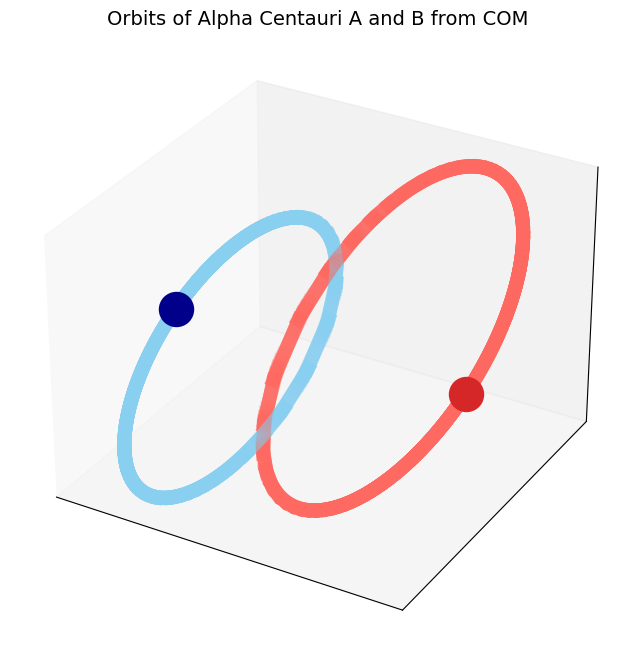

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.integrate as integrate

# Function to calculate the transparency gradient
def get_alpha_gradual_fade(i, N):
    return 1.0 - (i / N) ** 0.5

# Creating a new figure with the updated visualization style
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")

# Plotting the orbits with gradual fading and pastel colors
for i in range(len(r1com_sol)):
    alpha_val = get_alpha_gradual_fade(i, len(r1com_sol))
    ax.plot(r1com_sol[max(0, i - 1):i + 1, 0], r1com_sol[max(0, i - 1):i + 1, 1], r1com_sol[max(0, i - 1):i + 1, 2], color="#89CFF0", alpha=alpha_val, linewidth=10)
    ax.plot(r2com_sol[max(0, i - 1):i + 1, 0], r2com_sol[max(0, i - 1):i + 1, 1], r2com_sol[max(0, i - 1):i + 1, 2], color="#FF6961", alpha=alpha_val, linewidth=10)

# Adding the stars at the beginning of the trails
ax.scatter(r1com_sol[0, 0], r1com_sol[0, 1], r1com_sol[0, 2], color="darkblue", marker="o", s=600)
ax.scatter(r2com_sol[0, 0], r2com_sol[0, 1], r2com_sol[0, 2], color="tab:red", marker="o", s=600)

# Removing axis labels and tic marks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")

# Setting the title
ax.set_title("Orbits of Alpha Centauri A and B from COM", fontsize=14)

plt.show()

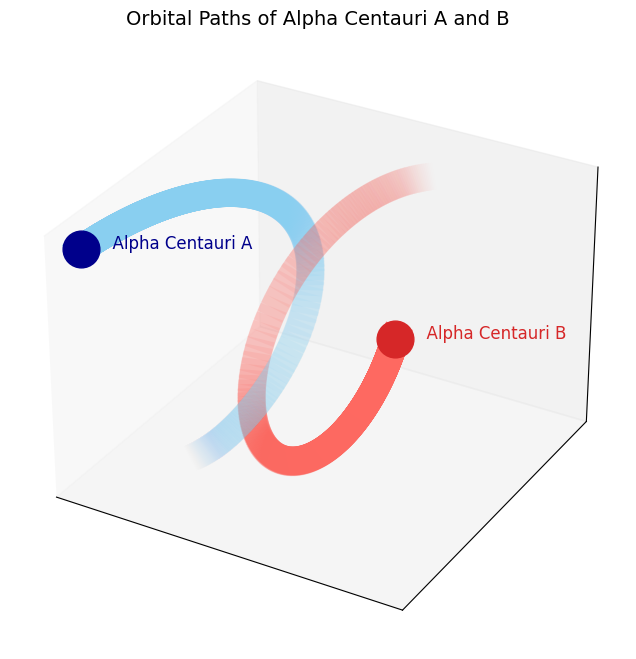

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.integrate as integrate

# Function to calculate the transparency gradient
def get_alpha_gradual_fade(i, N):
    return 1.0 - (i / N) ** 0.5

# Solving the Two-Body Problem
time_span = np.linspace(0, 0.75, 300)  # Adjust as needed
init_params = np.array([r1, r2, v1, v2]).flatten()
two_body_sol = integrate.odeint(TwoBodyEquations, init_params, time_span, args=(G, m1, m2))

# Extracting solutions
r1_sol = two_body_sol[:, :3]
r2_sol = two_body_sol[:, 3:6]

# Creating the plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the trails with gradual fading
for i in range(len(r1_sol)):
    alpha_val = get_alpha_gradual_fade(i, len(r1_sol))
    ax.plot(r1_sol[max(0, i - 1):i + 1, 0], r1_sol[max(0, i - 1):i + 1, 1], r1_sol[max(0, i - 1):i + 1, 2], color="#89CFF0", alpha=alpha_val, linewidth=20)
    ax.plot(r2_sol[max(0, i - 1):i + 1, 0], r2_sol[max(0, i - 1):i + 1, 1], r2_sol[max(0, i - 1):i + 1, 2], color="#FF6961", alpha=alpha_val, linewidth=20)

# Adding the stars at the beginning of the trails (time-reversed)
ax.scatter(r1_sol[0, 0], r1_sol[0, 1], r1_sol[0, 2], color="darkblue", marker="o", s=700)
ax.scatter(r2_sol[0, 0], r2_sol[0, 1], r2_sol[0, 2], color="tab:red", marker="o", s=700)

# Adding labels
ax.text(r1_sol[0, 0], r1_sol[0, 1], r1_sol[0, 2], "      Alpha Centauri A", color="darkblue", fontsize=12)
ax.text(r2_sol[0, 0], r2_sol[0, 1], r2_sol[0, 2], "      Alpha Centauri B", color="tab:red", fontsize=12)

# Customizing grid
ax.grid(True, color="#909090", linestyle=':', linewidth=0.01)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")


# Setting the title
ax.set_title("Orbital Paths of Alpha Centauri A and B", fontsize=14)

plt.show()

In [6]:
#Mass of the Third Star
m3=1.0 #Third Star

#Position of the Third Star
r3=[0,1,0] #m
r3=numpy.array(r3,dtype="float64")

#Velocity of the Third Star
v3=[0,-0.01,0]
v3=numpy.array(v3,dtype="float64")

In [7]:
#Update COM formula
r_com=(m1*r1+m2*r2+m3*r3)/(m1+m2+m3)

#Update velocity of COM formula
v_com=(m1*v1+m2*v2+m3*v3)/(m1+m2+m3)

In [8]:
def ThreeBodyEquations(w,t,G,m1,m2,m3):
    r1=w[:3]
    r2=w[3:6]
    r3=w[6:9]
    v1=w[9:12]
    v2=w[12:15]
    v3=w[15:18]

    r12=sci.linalg.norm(r2-r1)
    r13=sci.linalg.norm(r3-r1)
    r23=sci.linalg.norm(r3-r2)

    dv1bydt=K1*m2*(r2-r1)/r12**3+K1*m3*(r3-r1)/r13**3
    dv2bydt=K1*m1*(r1-r2)/r12**3+K1*m3*(r3-r2)/r23**3
    dv3bydt=K1*m1*(r1-r3)/r13**3+K1*m2*(r2-r3)/r23**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    dr3bydt=K2*v3

    r12_derivs=numpy.concatenate((dr1bydt,dr2bydt))
    r_derivs=numpy.concatenate((r12_derivs,dr3bydt))
    v12_derivs=numpy.concatenate((dv1bydt,dv2bydt))
    v_derivs=numpy.concatenate((v12_derivs,dv3bydt))
    derivs=numpy.concatenate((r_derivs,v_derivs))
    return derivs

In [9]:
#Package initial parameters
init_params=numpy.array([r1,r2,r3,v1,v2,v3]) #Initial parameters
init_params=init_params.flatten() #Flatten to make 1D array
time_span=numpy.linspace(0,20,500) #20 orbital periods and 500 points

#Run the ODE solver
import scipy.integrate

three_body_sol=sci.integrate.odeint(ThreeBodyEquations,init_params,time_span,args=(G,m1,m2,m3))

In [10]:
r1_sol=three_body_sol[:,:3]
r2_sol=three_body_sol[:,3:6]
r3_sol=three_body_sol[:,6:9]

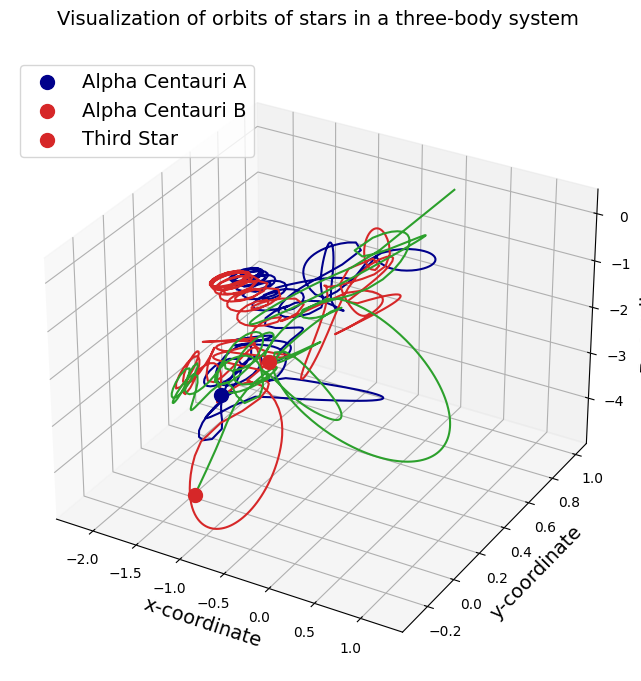

In [11]:
#Create figure
fig=plt.figure(figsize=(8,8))

#Create 3D axes
ax=fig.add_subplot(111,projection="3d")

#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
ax.plot(r3_sol[:,0],r3_sol[:,1],r3_sol[:,2],color="tab:green")

#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
ax.scatter(r3_sol[-1,0],r3_sol[-1,1],r3_sol[-1,2],color="tab:red",marker="o",s=100,label="Third Star")

#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a three-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)



---


# **ChatGPT4 turning this into an animation:**

---





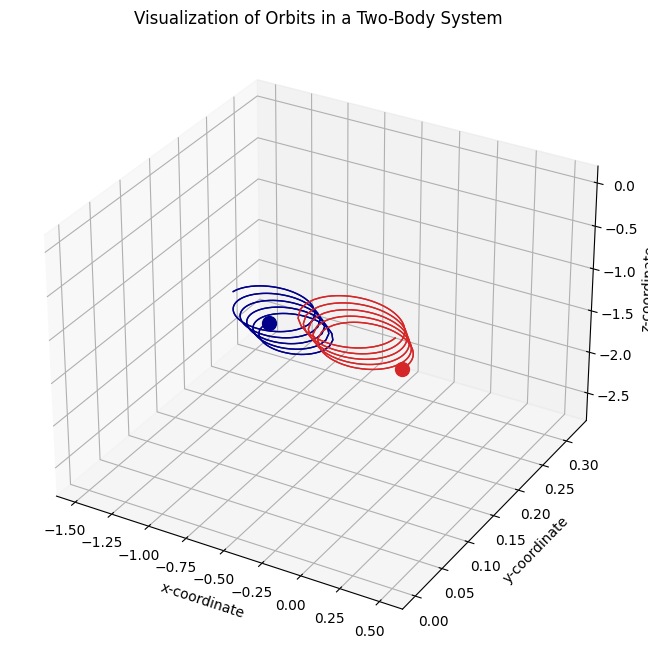

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import scipy.integrate

# Constants and Parameters
G = 6.67408e-11  # Gravitational constant
m_nd = 1.989e+30  # Mass of the sun (kg)
r_nd = 5.326e+12  # Distance between stars in Alpha Centauri (m)
v_nd = 30000  # Relative velocity of earth around the sun (m/s)
t_nd = 79.91 * 365 * 24 * 3600 * 0.51  # Orbital period of Alpha Centauri (s)

K1 = G * t_nd * m_nd / (r_nd**2 * v_nd)
K2 = v_nd * t_nd / r_nd

# Masses
m1 = 1.1  # Alpha Centauri A
m2 = 0.907  # Alpha Centauri B

# Initial position vectors
r1 = [-0.5, 0, 0]  # m
r2 = [0.5, 0, 0]  # m

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import scipy.integrate

# Constants and Parameters
G = 6.67408e-11  # Gravitational constant
m_nd = 1.989e+30  # Mass of the sun (kg)
r_nd = 5.326e+12  # Distance between stars in Alpha Centauri (m)
v_nd = 30000  # Relative velocity of earth around the sun (m/s)
t_nd = 79.91 * 365 * 24 * 3600 * 0.51  # Orbital period of Alpha Centauri (s)

K1 = G * t_nd * m_nd / (r_nd**2 * v_nd)
K2 = v_nd * t_nd / r_nd

# Masses
m1 = 1.1  # Alpha Centauri A
m2 = 0.907  # Alpha Centauri B

# Initial position vectors
r1 = [-0.5, 0, 0]  # m
r2 = [0.5, 0, 0]  # m

r1 = np.array(r1, dtype="float64")
r2 = np.array(r2, dtype="float64")

# Initial velocities
v1 = [0.01, 0.01, 0]  # m/s
v2 = [-0.05, 0, -0.1]  # m/s

v1 = np.array(v1, dtype="float64")
v2 = np.array(v2, dtype="float64")

# Equations of Motion
def TwoBodyEquations(w, t, G, m1, m2):
    r1 = w[:3]
    r2 = w[3:6]
    v1 = w[6:9]
    v2 = w[9:12]

    r = np.linalg.norm(r2-r1)

    dv1bydt = K1 * m2 * (r2 - r1) / r**3
    dv2bydt = K1 * m1 * (r1 - r2) / r**3
    dr1bydt = K2 * v1
    dr2bydt = K2 * v2

    r_derivs = np.concatenate((dr1bydt, dr2bydt))
    derivs = np.concatenate((r_derivs, dv1bydt, dv2bydt))
    return derivs

# Initial parameters
init_params = np.array([r1, r2, v1, v2]).flatten()
time_span = np.linspace(0, 8, 500)  # 8 orbital periods, 500 points

# Solve the equations
two_body_sol = scipy.integrate.odeint(TwoBodyEquations, init_params, time_span, args=(G, m1, m2))
r1_sol = two_body_sol[:, :3]
r2_sol = two_body_sol[:, 3:6]

# Animation setup
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")

def init():
    ax.plot(r1_sol[:, 0], r1_sol[:, 1], r1_sol[:, 2], color="darkblue", lw=1)
    ax.plot(r2_sol[:, 0], r2_sol[:, 1], r2_sol[:, 2], color="tab:red", lw=1)
    return fig,

def animate(i):
    ax.clear()
    ax.plot(r1_sol[:i, 0], r1_sol[:i, 1], r1_sol[:i, 2], color="darkblue", lw=1)
    ax.plot(r2_sol[:i, 0], r2_sol[:i, 1], r2_sol[:i, 2], color="tab:red", lw=1)
    ax.scatter(r1_sol[i, 0], r1_sol[i, 1], r1_sol[i, 2], color="darkblue", marker="o", s=100)
    ax.scatter(r2_sol[i, 0], r2_sol[i, 1], r2_sol[i, 2], color="tab:red", marker="o", s=100)
    ax.set_xlabel("x-coordinate")
    ax.set_ylabel("y-coordinate")
    ax.set_zlabel("z-coordinate")
    ax.set_title("Visualization of Orbits in a Two-Body System")
    return fig,

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(time_span), init_func=init, interval=50)

# Save the animation as a video file
ani.save('orbit_animation.mp4', writer='ffmpeg', fps=20)

# Display the video in Colab
from IPython.display import Video
Video('orbit_animation.mp4')

# CHAT GPT4 SOLUTION FOR A GRAPH ON VELOCITY:

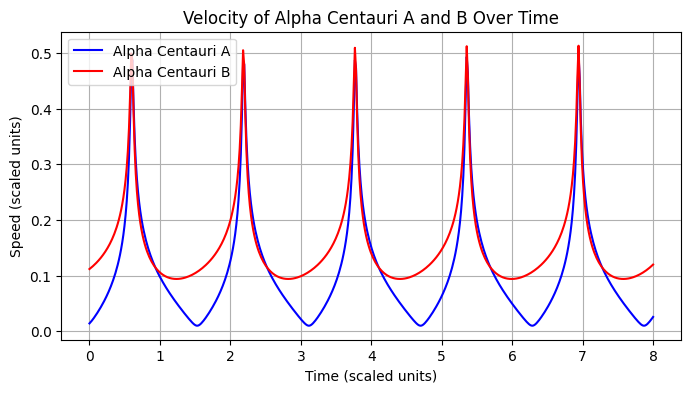

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.linalg import norm

# Constants
G = 6.67408e-11  # Gravitational constant, N-m2/kg2
m_nd = 1.989e+30  # Mass of the sun, kg
r_nd = 5.326e+12  # Distance between stars in Alpha Centauri, m
v_nd = 30000  # Relative velocity of earth around the sun, m/s
t_nd = 79.91 * 365 * 24 * 3600 * 0.51  # Orbital period of Alpha Centauri, s

# Net constants
K1 = G * t_nd * m_nd / (r_nd**2 * v_nd)
K2 = v_nd * t_nd / r_nd

# Masses
m1 = 1.1  # Alpha Centauri A
m2 = 0.907  # Alpha Centauri B

# Initial position vectors
r1 = np.array([-0.5, 0, 0], dtype="float64")
r2 = np.array([0.5, 0, 0], dtype="float64")

# Initial velocities
v1 = np.array([0.01, 0.01, 0], dtype="float64")
v2 = np.array([-0.05, 0, -0.1], dtype="float64")

# Equations of Motion
def TwoBodyEquations(w, t, G, m1, m2):
    r1 = w[:3]
    r2 = w[3:6]
    v1 = w[6:9]
    v2 = w[9:12]

    r = norm(r2 - r1)

    dv1bydt = K1 * m2 * (r2 - r1) / r**3
    dv2bydt = K1 * m1 * (r1 - r2) / r**3
    dr1bydt = K2 * v1
    dr2bydt = K2 * v2

    derivs = np.concatenate((dr1bydt, dr2bydt, dv1bydt, dv2bydt))
    return derivs

# Initial parameters
init_params = np.array([r1, r2, v1, v2]).flatten()

# Time span
time_span = np.linspace(0, 8, 500)  # 8 orbital periods, 500 points

# Solve ODE
two_body_sol = odeint(TwoBodyEquations, init_params, time_span, args=(G, m1, m2))

# Extract velocities
v1_sol = two_body_sol[:, 6:9]
v2_sol = two_body_sol[:, 9:12]

# Calculate speeds
speed1 = np.linalg.norm(v1_sol, axis=1)
speed2 = np.linalg.norm(v2_sol, axis=1)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(time_span, speed1, label="Alpha Centauri A", color='blue')
plt.plot(time_span, speed2, label="Alpha Centauri B", color='red')
plt.xlabel("Time (scaled units)")
plt.ylabel("Speed (scaled units)")
plt.title("Velocity of Alpha Centauri A and B Over Time")
plt.legend()
plt.grid(True)
plt.show()


# AND ACCELERATION:

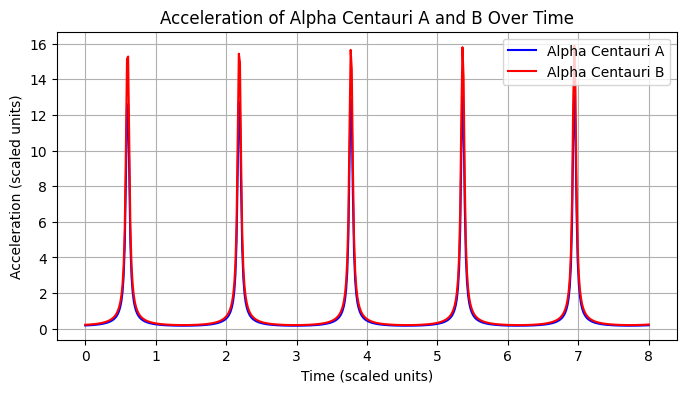

In [14]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ... [previous code for constants, masses, initial conditions, and TwoBodyEquations function] ...

# Time span for solving the ODE
time_span = np.linspace(0, 8, 500)  # 8 orbital periods, 500 points

# Solve ODE
two_body_sol = odeint(TwoBodyEquations, init_params, time_span, args=(G, m1, m2))

# Extract velocities
v1_sol = two_body_sol[:, 6:9]
v2_sol = two_body_sol[:, 9:12]

# Calculate acceleration by taking the derivative of velocity
acceleration1 = np.gradient(v1_sol, time_span, axis=0)
acceleration2 = np.gradient(v2_sol, time_span, axis=0)

# Calculate magnitudes of accelerations
acceleration1_magnitude = np.linalg.norm(acceleration1, axis=1)
acceleration2_magnitude = np.linalg.norm(acceleration2, axis=1)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(time_span, acceleration1_magnitude, label="Alpha Centauri A", color='blue')
plt.plot(time_span, acceleration2_magnitude, label="Alpha Centauri B", color='red')
plt.xlabel("Time (scaled units)")
plt.ylabel("Acceleration (scaled units)")
plt.title("Acceleration of Alpha Centauri A and B Over Time")
plt.legend()
plt.grid(True)
plt.show()


# LET'S ADD SOME WOBBLE AND REDO:

<Axes3D: >

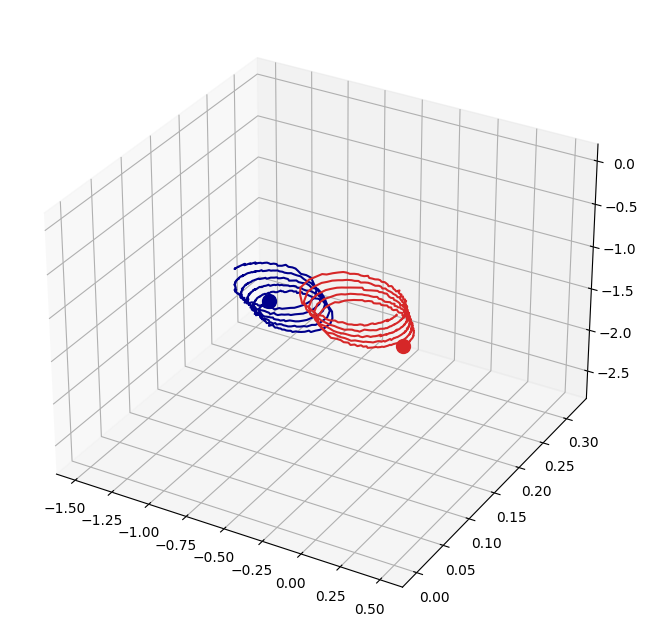

In [15]:
# adding a tiny bit of wobble to r1_sol and r2_sol
import scipy as sci
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import scipy.linalg
import numpy as np

# Define universal gravitation constant and other constants
G = 6.67408e-11  # N-m2/kg2
m_nd = 1.989e+30  # kg - mass of the sun
r_nd = 5.326e+12  # m - distance between stars in Alpha Centauri
v_nd = 30000  # m/s - relative velocity of earth around the sun
t_nd = 79.91 * 365 * 24 * 3600 * 0.51  # s - orbital period of Alpha Centauri
K1 = G * t_nd * m_nd / (r_nd**2 * v_nd)
K2 = v_nd * t_nd / r_nd
# Define masses
m1 = 1.1  # Alpha Centauri A
m2 = 0.907  # Alpha Centauri B
# Define initial position vectors and convert to arrays
r1 = numpy.array([-0.5, 0, 0], dtype="float64")  # m
r2 = numpy.array([0.5, 0, 0], dtype="float64")  # m
# Define initial velocities and convert to arrays
v1 = numpy.array([0.01, 0.01, 0], dtype="float64")  # m/s
v2 = numpy.array([-0.05, 0, -0.1], dtype="float64")  # m/s

# Function defining the equations of motion
def TwoBodyEquations(w, t, G, m1, m2):
    r1, r2 = w[:3], w[3:6]
    v1, v2 = w[6:9], w[9:12]
    r = sci.linalg.norm(r2 - r1)
    dv1bydt = K1 * m2 * (r2 - r1) / r**3
    dv2bydt = K1 * m1 * (r1 - r2) / r**3
    dr1bydt = K2 * v1
    dr2bydt = K2 * v2
    return numpy.concatenate((dr1bydt, dr2bydt, dv1bydt, dv2bydt))
# Package initial parameters
init_params = numpy.array([r1, r2, v1, v2]).flatten()  # flatten array to make it 1D
time_span = numpy.linspace(0, 8, 500)  # 8 orbital periods, 500 points
# Run the ODE solver
two_body_sol = odeint(TwoBodyEquations, init_params, time_span, args=(G, m1, m2))
# Extracting solutions for r1 and r2
r1_sol = two_body_sol[:, :3]
r2_sol = two_body_sol[:, 3:6]

# Defining the wobble intensity
wobble_intensity = 0.001
# Adding wobble to r1_sol and r2_sol
r1_sol_wobble = r1_sol + numpy.random.normal(0, wobble_intensity, r1_sol.shape)
r2_sol_wobble = r2_sol + numpy.random.normal(0, wobble_intensity, r2_sol.shape)

# Creating figure with wobble
fig_wobble = plt.figure(figsize=(8, 8))
ax_wobble = fig_wobble.add_subplot(111, projection="3d")
# Plotting the orbits with wobble
ax_wobble.plot(r1_sol_wobble[:, 0], r1_sol_wobble[:, 1], r1_sol_wobble[:, 2], color="darkblue")
ax_wobble.plot(r2_sol_wobble[:, 0], r2_sol_wobble[:, 1], r2_sol_wobble[:, 2], color="tab:red")
# Plotting the final positions of the stars with wobble
ax_wobble.scatter(r1_sol_wobble[-1, 0], r1_sol_wobble[-1, 1], r1_sol_wobble[-1, 2], color="darkblue", marker="o", s=100, label="Alpha Centauri A (wobble)")
ax_wobble.scatter(r2_sol_wobble[-1, 0], r2_sol_wobble[-1, 1], r2_sol_wobble[-1, 2], color="tab:red", marker="o", s=100, label="Alpha Centauri B (wobble)")
# Adding labels and title
ax_wobble


# ACCELERATION WITH MEDIAN:

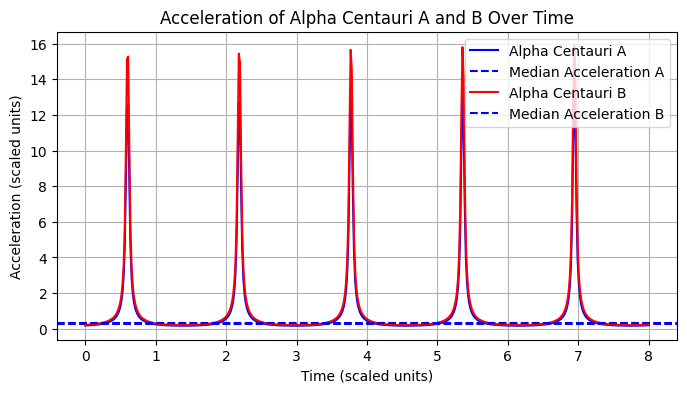

In [16]:
median_acceleration_A = np.median(acceleration1_magnitude)
median_acceleration_B = np.median(acceleration2_magnitude)

# Plotting acceleration profiles with median lines
plt.figure(figsize=(8, 4))
plt.plot(time_span, acceleration1_magnitude, label="Alpha Centauri A", color='blue')
plt.axhline(y=median_acceleration_A, color='blue', linestyle='--', label="Median Acceleration A")
plt.plot(time_span, acceleration2_magnitude, label="Alpha Centauri B", color='red')
plt.axhline(y=median_acceleration_B, color='blue', linestyle='--', label="Median Acceleration B")
plt.xlabel("Time (scaled units)")
plt.ylabel("Acceleration (scaled units)")
plt.title("Acceleration of Alpha Centauri A and B Over Time")
plt.legend()
plt.grid(True)
plt.show()

# STAIRCASE PLOT FOLLOWING BINARIZATION:

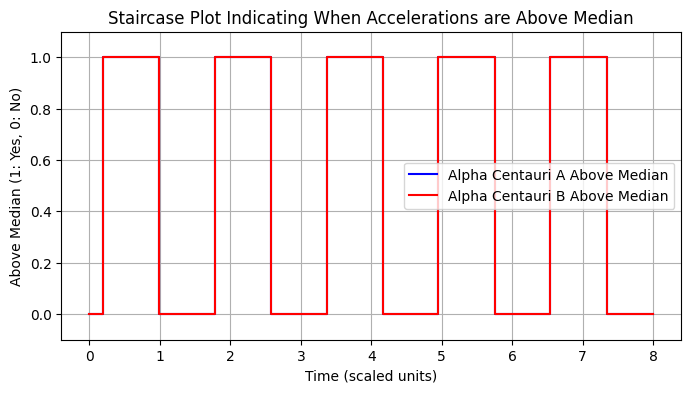

In [17]:
# Creating a staircase plot to show when velocities are above or below the median
above_median_A = np.where(acceleration1_magnitude > median_acceleration_A, 1, 0)
above_median_B = np.where(acceleration2_magnitude > median_acceleration_B, 1, 0)

# Plotting
plt.figure(figsize=(8, 4))

# Staircase plot for Alpha Centauri A
plt.step(time_span, above_median_A, label="Alpha Centauri A Above Median", color='blue')

# Staircase plot for Alpha Centauri B
plt.step(time_span, above_median_B, label="Alpha Centauri B Above Median", color='red')

plt.title("Staircase Plot Indicating When Accelerations are Above Median")
plt.xlabel("Time (scaled units)")
plt.ylabel("Above Median (1: Yes, 0: No)")
plt.ylim(-0.1, 1.1)  # Set y limits to clearly show 0 and 1
plt.legend()
plt.grid(True)
plt.show()

# STATE HISTOGRAM:

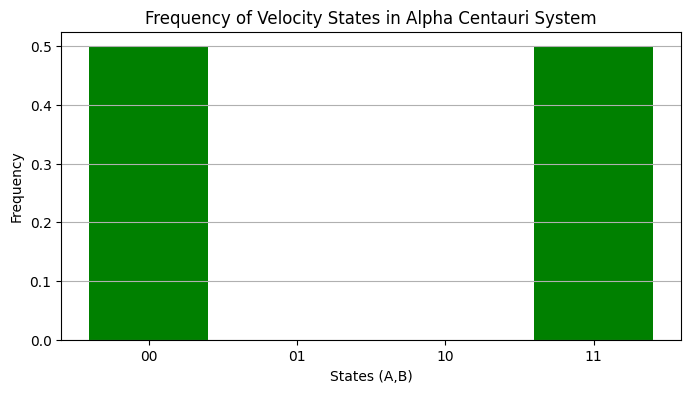

In [18]:
# Combining the states of A and B to determine the four different states
combined_states = above_median_A * 2 + above_median_B

# Counting the occurrences of each state
state_counts = np.bincount(combined_states, minlength=4)

# Calculating the frequency of each state
state_frequencies = state_counts / len(combined_states)

# State labels
state_labels = ['00', '01', '10', '11']

# Plotting histogram
plt.figure(figsize=(8, 4))
plt.bar(state_labels, state_frequencies, color='green')
plt.title("Frequency of Velocity States in Alpha Centauri System")
plt.xlabel("States (A,B)")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

# TPM

<ipython-input-19-5f56d424042a>:15: RuntimeWarning: invalid value encountered in divide
  normalized_transition_matrix = transition_matrix / row_sums


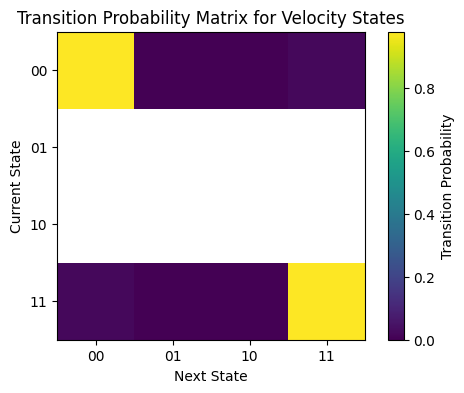

In [19]:
# Function to calculate transition probabilities between states
def calculate_transition_probabilities(states):
    # Number of unique states
    num_states = 4

    # Initialize transition matrix
    transition_matrix = np.zeros((num_states, num_states))

    # Count transitions
    for (current, next_) in zip(states[:-1], states[1:]):
        transition_matrix[current, next_] += 1

    # Normalize each row to get probabilities
    row_sums = transition_matrix.sum(axis=1, keepdims=True)
    normalized_transition_matrix = transition_matrix / row_sums

    return normalized_transition_matrix

# Calculate the transition probabilities
transition_probabilities = calculate_transition_probabilities(combined_states)

# Plotting the transition matrix as a heatmap
plt.figure(figsize=(6, 4))
plt.imshow(transition_probabilities, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Transition Probability')
plt.xticks(range(4), state_labels)
plt.yticks(range(4), state_labels)
plt.title('Transition Probability Matrix for Velocity States')
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.show()

# VELOCITY WITH MEDIAN:

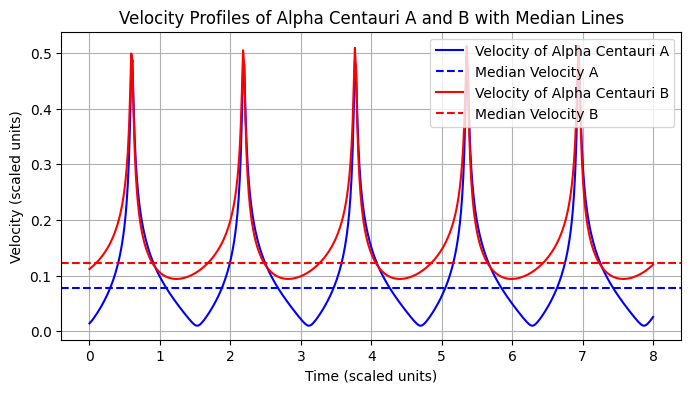

In [20]:
# Calculating median velocities for Alpha Centauri A and B
median_velocity_A = np.median(np.linalg.norm(v1_sol, axis=1))
median_velocity_B = np.median(np.linalg.norm(v2_sol, axis=1))

# Plotting velocity profiles with median lines
plt.figure(figsize=(8, 4))

# Plotting velocity of Alpha Centauri A
plt.plot(time_span, np.linalg.norm(v1_sol, axis=1), label="Velocity of Alpha Centauri A", color='blue')
plt.axhline(y=median_velocity_A, color='blue', linestyle='--', label="Median Velocity A")

# Plotting velocity of Alpha Centauri B
plt.plot(time_span, np.linalg.norm(v2_sol, axis=1), label="Velocity of Alpha Centauri B", color='red')
plt.axhline(y=median_velocity_B, color='red', linestyle='--', label="Median Velocity B")

plt.title("Velocity Profiles of Alpha Centauri A and B with Median Lines")
plt.xlabel("Time (scaled units)")
plt.ylabel("Velocity (scaled units)")
plt.legend()
plt.grid(True)
plt.show()


# STAIRCASE PLOT FOLLOWING BINARIZATION:

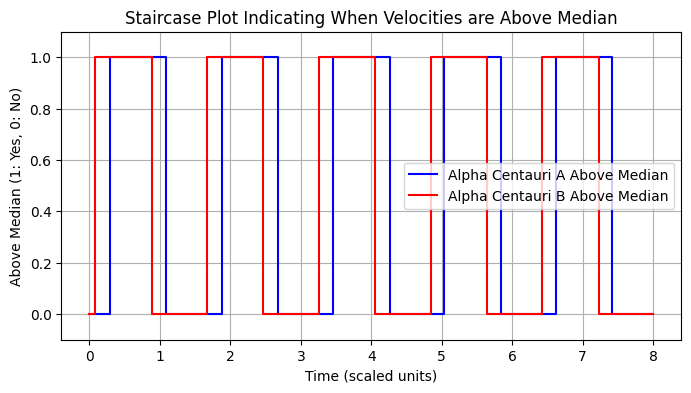

In [21]:
# Creating a staircase plot to show when velocities are above or below the median
above_median_A = np.where(np.linalg.norm(v1_sol, axis=1) > median_velocity_A, 1, 0)
above_median_B = np.where(np.linalg.norm(v2_sol, axis=1) > median_velocity_B, 1, 0)

# Plotting
plt.figure(figsize=(8, 4))

# Staircase plot for Alpha Centauri A
plt.step(time_span, above_median_A, label="Alpha Centauri A Above Median", color='blue')

# Staircase plot for Alpha Centauri B
plt.step(time_span, above_median_B, label="Alpha Centauri B Above Median", color='red')

plt.title("Staircase Plot Indicating When Velocities are Above Median")
plt.xlabel("Time (scaled units)")
plt.ylabel("Above Median (1: Yes, 0: No)")
plt.ylim(-0.1, 1.1)  # Set y limits to clearly show 0 and 1
plt.legend()
plt.grid(True)
plt.show()


# STATE HISTOGRAM:

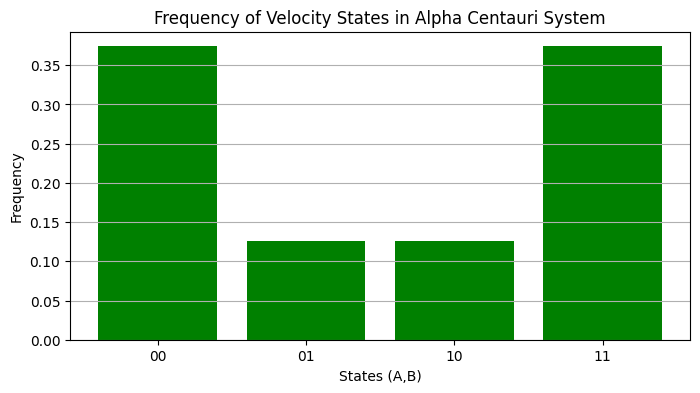

In [22]:
# Combining the states of A and B to determine the four different states
combined_states = above_median_A * 2 + above_median_B

# Counting the occurrences of each state
state_counts = np.bincount(combined_states, minlength=4)

# Calculating the frequency of each state
state_frequencies = state_counts / len(combined_states)

# State labels
state_labels = ['00', '01', '10', '11']

# Plotting histogram
plt.figure(figsize=(8, 4))
plt.bar(state_labels, state_frequencies, color='green')
plt.title("Frequency of Velocity States in Alpha Centauri System")
plt.xlabel("States (A,B)")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()


# TPM:

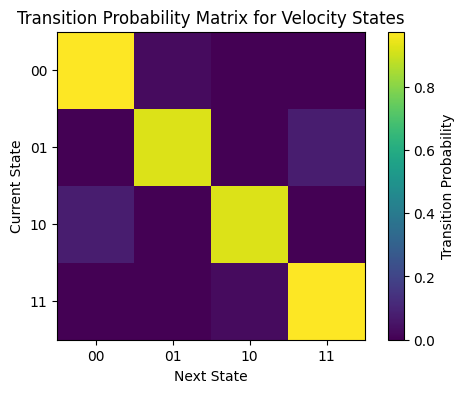

In [23]:
# Function to calculate transition probabilities between states
def calculate_transition_probabilities(states):
    # Number of unique states
    num_states = 4

    # Initialize transition matrix
    transition_matrix = np.zeros((num_states, num_states))

    # Count transitions
    for (current, next_) in zip(states[:-1], states[1:]):
        transition_matrix[current, next_] += 1

    # Normalize each row to get probabilities
    row_sums = transition_matrix.sum(axis=1, keepdims=True)
    normalized_transition_matrix = transition_matrix / row_sums

    return normalized_transition_matrix

# Calculate the transition probabilities
transition_probabilities = calculate_transition_probabilities(combined_states)

# Plotting the transition matrix as a heatmap
plt.figure(figsize=(6, 4))
plt.imshow(transition_probabilities, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Transition Probability')
plt.xticks(range(4), state_labels)
plt.yticks(range(4), state_labels)
plt.title('Transition Probability Matrix for Velocity States')
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.show()


# COMPUTE IIT

In [24]:
#!python -m pip install -U git+https://github.com/wmayner/pyphi.git@feature/iit-4.0
!python -m pip install -U git+https://github.com/dralvima/pyphihat
!pip install pillow
from PIL import Image
import matplotlib.pyplot as plt
import pyphi
import numpy as np
import itertools
import pandas as pd


pyphi.config.PROGRESS_BARS = False
pyphi.config.PARALLEL = False
pyphi.config.SHORTCIRCUIT_SIA = False
pyphi.config.VALIDATE_SUBSYSTEM_STATES = False

  Cloning https://github.com/dralvima/pyphihat to /tmp/pip-req-build-llv3pegb
  Running command git clone --filter=blob:none --quiet https://github.com/dralvima/pyphihat /tmp/pip-req-build-llv3pegb
  Resolved https://github.com/dralvima/pyphihat to commit 8b738158ccbceada3069b9b44865eb60b2ffa386
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.6/662.6 kB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [25]:
# Define units
unit_labels = ["A", "B"]
n_units = len(unit_labels) # 2 units

In [26]:
sbstpm = transition_probabilities

❌**!!! Make sure the state-by-state TPM follows the 'little endian' convention !!!**

In [27]:
print(sbstpm)

[[0.97311828 0.02688172 0.         0.        ]
 [0.         0.92063492 0.         0.07936508]
 [0.07936508 0.         0.92063492 0.        ]
 [0.         0.         0.02673797 0.97326203]]


In [28]:
tpm = pyphi.convert.sbs2sbn(sbstpm)

{0: (0, 0), 1: (1, 0), 2: (0, 1), 3: (1, 1)}


In [29]:
pyPhiInput = tpm
labels = ('A','B')

In [30]:
network = pyphi.Network(pyPhiInput, node_labels=labels)
node_indices = (0,1)

In [31]:
state = (0,1)

In [32]:
candidate_system = pyphi.Subsystem(network, state, node_indices)

In [33]:
phi_structure = pyphi.new_big_phi.phi_structure(candidate_system)
big_phi = phi_structure.big_phi

In [34]:
from pyphi import visualize
fig = visualize.phi_structure.plot_phi_structure(phi_structure=phi_structure,subsystem=candidate_system)
fig.show()

# And 3 BODY (this might be perfect since the 3-way interaction is limited in time):

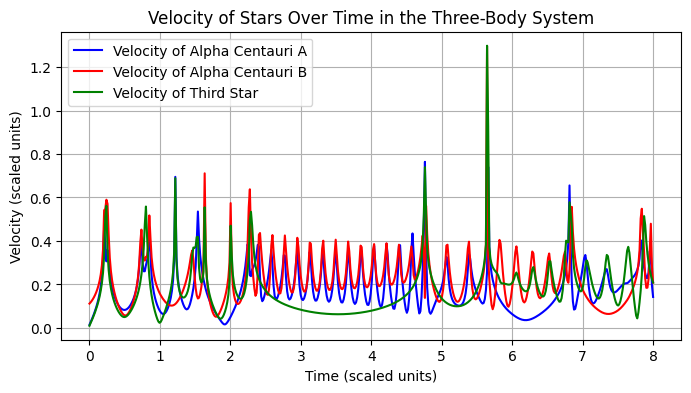

In [35]:
# Extracting velocities from the solution
v1_sol = three_body_sol[:, 9:12]
v2_sol = three_body_sol[:, 12:15]
v3_sol = three_body_sol[:, 15:18]

# Calculate the magnitudes of the velocities
speed1 = np.linalg.norm(v1_sol, axis=1)
speed2 = np.linalg.norm(v2_sol, axis=1)
speed3 = np.linalg.norm(v3_sol, axis=1)

# Plotting velocities over time
plt.figure(figsize=(8, 4))
plt.plot(time_span, speed1, label="Velocity of Alpha Centauri A", color='blue')
plt.plot(time_span, speed2, label="Velocity of Alpha Centauri B", color='red')
plt.plot(time_span, speed3, label="Velocity of Third Star", color='green')
plt.xlabel("Time (scaled units)")
plt.ylabel("Velocity (scaled units)")
plt.title("Velocity of Stars Over Time in the Three-Body System")
plt.legend()
plt.grid(True)
plt.show()


# ACCELERATION:

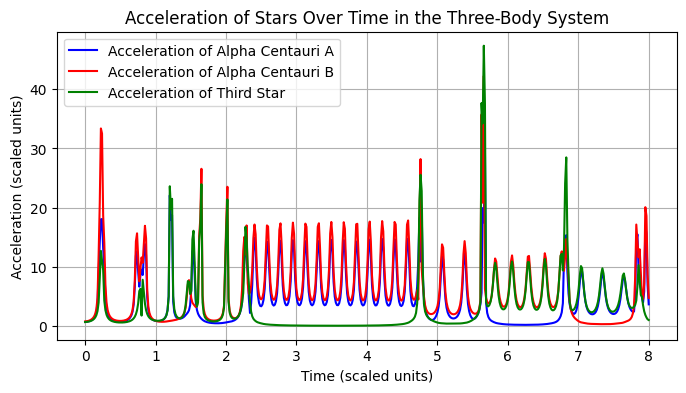

In [36]:
# Calculating acceleration by taking the derivative of velocity
acceleration1 = np.gradient(v1_sol, time_span, axis=0)
acceleration2 = np.gradient(v2_sol, time_span, axis=0)
acceleration3 = np.gradient(v3_sol, time_span, axis=0)

# Calculate magnitudes of accelerations
acceleration1_magnitude = np.linalg.norm(acceleration1, axis=1)
acceleration2_magnitude = np.linalg.norm(acceleration2, axis=1)
acceleration3_magnitude = np.linalg.norm(acceleration3, axis=1)

# Plotting the acceleration graph
plt.figure(figsize=(8, 4))
plt.plot(time_span, acceleration1_magnitude, label="Acceleration of Alpha Centauri A", color='blue')
plt.plot(time_span, acceleration2_magnitude, label="Acceleration of Alpha Centauri B", color='red')
plt.plot(time_span, acceleration3_magnitude, label="Acceleration of Third Star", color='green')
plt.xlabel("Time (scaled units)")
plt.ylabel("Acceleration (scaled units)")
plt.title("Acceleration of Stars Over Time in the Three-Body System")
plt.legend()
plt.grid(True)
plt.show()


# BINARIZING THE ACCELERATIONS:

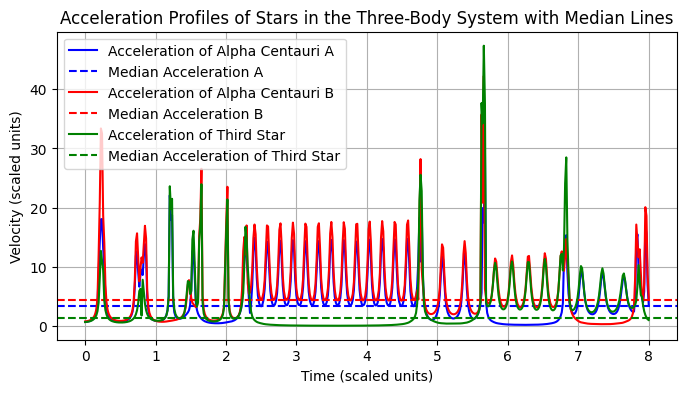

In [37]:
# Calculating median acceleration for each star
median_acceleration_A = np.median(acceleration1_magnitude)
median_acceleration_B = np.median(acceleration2_magnitude)
median_acceleration_C = np.median(acceleration3_magnitude)

# Plotting acceleration profiles with median lines
plt.figure(figsize=(8, 4))

# Plotting acceleration of Alpha Centauri A
plt.plot(time_span, acceleration1_magnitude, label="Acceleration of Alpha Centauri A", color='blue')
plt.axhline(y=median_acceleration_A, color='blue', linestyle='--', label="Median Acceleration A")

# Plotting velocity of Alpha Centauri B
plt.plot(time_span, acceleration2_magnitude, label="Acceleration of Alpha Centauri B", color='red')
plt.axhline(y=median_acceleration_B, color='red', linestyle='--', label="Median Acceleration B")

# Plotting velocity of the Third Star
plt.plot(time_span, acceleration3_magnitude, label="Acceleration of Third Star", color='green')
plt.axhline(y=median_acceleration_C, color='green', linestyle='--', label="Median Acceleration of Third Star")

plt.title("Acceleration Profiles of Stars in the Three-Body System with Median Lines")
plt.xlabel("Time (scaled units)")
plt.ylabel("Velocity (scaled units)")
plt.legend()
plt.grid(True)
plt.show()

# STAIRCASE THE ACCELERATION:

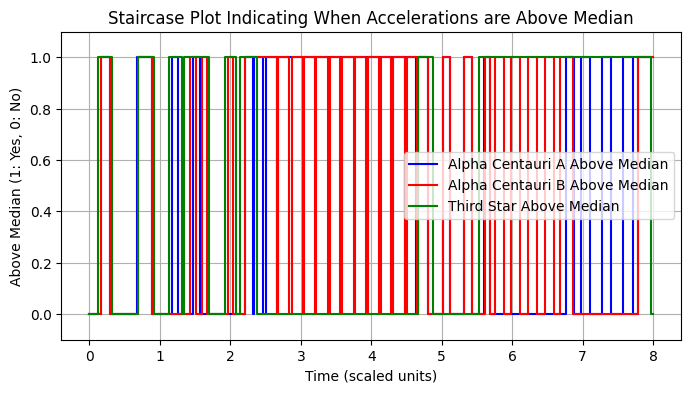

In [38]:
# Creating a staircase plot to indicate when velocities are above or below the median for each star
above_median_A = np.where(acceleration1_magnitude > median_acceleration_A, 1, 0)
above_median_B = np.where(acceleration2_magnitude > median_acceleration_B, 1, 0)
above_median_3 = np.where(acceleration3_magnitude > median_acceleration_C, 1, 0)

# Plotting
plt.figure(figsize=(8, 4))

# Staircase plot for Alpha Centauri A
plt.step(time_span, above_median_A, label="Alpha Centauri A Above Median", color='blue')

# Staircase plot for Alpha Centauri B
plt.step(time_span, above_median_B, label="Alpha Centauri B Above Median", color='red')

# Staircase plot for the Third Star
plt.step(time_span, above_median_3, label="Third Star Above Median", color='green')

plt.title("Staircase Plot Indicating When Accelerations are Above Median")
plt.xlabel("Time (scaled units)")
plt.ylabel("Above Median (1: Yes, 0: No)")
plt.ylim(-0.1, 1.1)  # Set y limits to clearly show 0 and 1
plt.legend()
plt.grid(True)
plt.show()

# ACCELERATION STATE HISTOGRAM:

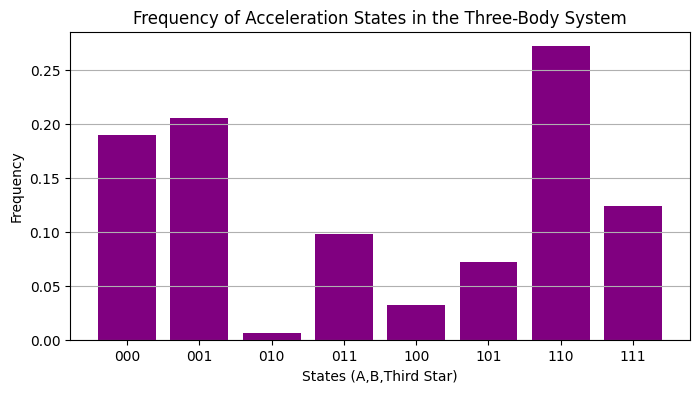

In [39]:
# Combining the states of all three stars to determine the possible system states
combined_states = above_median_A * 4 + above_median_B * 2 + above_median_3

# Counting the occurrences of each state
state_counts = np.bincount(combined_states, minlength=8)

# Calculating the frequency of each state
state_frequencies = state_counts / len(combined_states)

# State labels (from '000' to '111')
state_labels = [format(i, '03b') for i in range(8)]

# Plotting histogram of state frequencies
plt.figure(figsize=(8, 4))
plt.bar(state_labels, state_frequencies, color='purple')
plt.title("Frequency of Acceleration States in the Three-Body System")
plt.xlabel("States (A,B,Third Star)")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

# ACCELERATION TPM

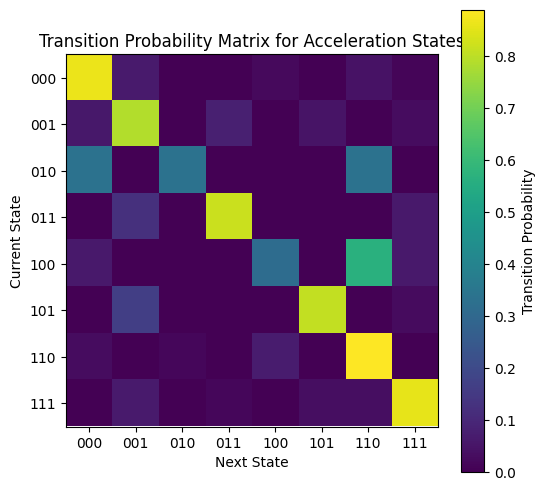

In [40]:
# Function to calculate transition probabilities between states for the three-body system
def calculate_transition_probabilities(states, num_states):
    # Initialize transition matrix
    transition_matrix = np.zeros((num_states, num_states))

    # Count transitions
    for (current, next_) in zip(states[:-1], states[1:]):
        transition_matrix[current, next_] += 1

    # Normalize each row to get probabilities
    row_sums = transition_matrix.sum(axis=1, keepdims=True)
    normalized_transition_matrix = transition_matrix / row_sums

    return normalized_transition_matrix

# Number of unique states for the three-body system (2^3 = 8)
num_states = 8

# Calculate the transition probabilities
transition_probabilities = calculate_transition_probabilities(combined_states, num_states)

# Plotting the transition matrix as a heatmap
plt.figure(figsize=(6, 6))
plt.imshow(transition_probabilities, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Transition Probability')
plt.xticks(range(num_states), state_labels)
plt.yticks(range(num_states), state_labels)
plt.title('Transition Probability Matrix for Acceleration States')
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.show()

# DO IIT FOR ACCELERATION

In [41]:
# Define units
unit_labels = ["A", "B", "C"]
n_units = len(unit_labels) # 3 units
sbstpm = transition_probabilities
tpm = pyphi.convert.sbs2sbn(sbstpm)
pyPhiInput = tpm
labels = ('A','B','C')
network = pyphi.Network(pyPhiInput, node_labels=labels)
node_indices = (0,1,2)
################################################################################
state = (1,1,1)
################################################################################
candidate_system = pyphi.Subsystem(network, state, node_indices)
phi_structure = pyphi.new_big_phi.phi_structure(candidate_system)
big_phi = phi_structure.big_phi
fig = visualize.phi_structure.plot_phi_structure(phi_structure,subsystem=candidate_system)
fig.show()

{0: (0, 0, 0), 1: (1, 0, 0), 2: (0, 1, 0), 3: (1, 1, 0), 4: (0, 0, 1), 5: (1, 0, 1), 6: (0, 1, 1), 7: (1, 1, 1)}



------------



# BINARIZATION OF VELOCITY:

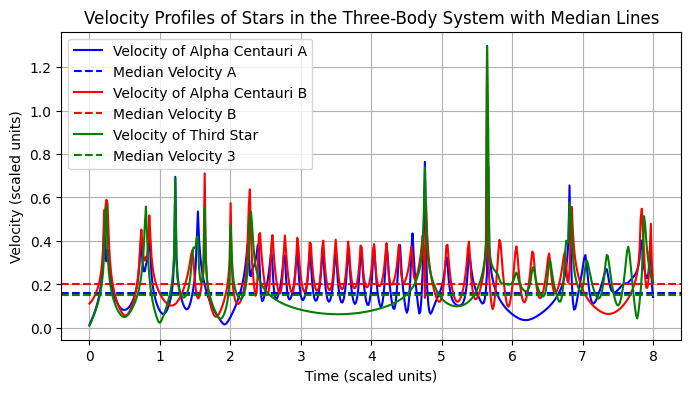

In [42]:
# Calculating median velocities for each star
median_velocity_A = np.median(speed1)
median_velocity_B = np.median(speed2)
median_velocity_3 = np.median(speed3)

# Plotting velocity profiles with median lines
plt.figure(figsize=(8, 4))

# Plotting velocity of Alpha Centauri A
plt.plot(time_span, speed1, label="Velocity of Alpha Centauri A", color='blue')
plt.axhline(y=median_velocity_A, color='blue', linestyle='--', label="Median Velocity A")

# Plotting velocity of Alpha Centauri B
plt.plot(time_span, speed2, label="Velocity of Alpha Centauri B", color='red')
plt.axhline(y=median_velocity_B, color='red', linestyle='--', label="Median Velocity B")

# Plotting velocity of the Third Star
plt.plot(time_span, speed3, label="Velocity of Third Star", color='green')
plt.axhline(y=median_velocity_3, color='green', linestyle='--', label="Median Velocity 3")

plt.title("Velocity Profiles of Stars in the Three-Body System with Median Lines")
plt.xlabel("Time (scaled units)")
plt.ylabel("Velocity (scaled units)")
plt.legend()
plt.grid(True)
plt.show()



# **TERNARY COSINE SIMILARITY** (for velocity)

In [43]:
import math

def dot_product(vectorA, vectorB):
    return sum(a * b for a, b in zip(vectorA, vectorB))

def dot_product_ternary(vectorA, vectorB, vectorC):
    return sum(a * b * c for a, b, c in zip(vectorA, vectorB, vectorC))

def magnitude(vector):
    return math.sqrt(sum(a**2 for a in vector))

def normalize(vector):
    mag = magnitude(vector)
    if mag == 0:
        return [0 for _ in vector]
    return [a / mag for a in vector]

def cosine_similarity(vectorA, vectorB):
    # Calculate the magnitude of the vectors
    magnitudeA = magnitude(vectorA)
    magnitudeB = magnitude(vectorB)
    # Calculate the dot product
    dotProd = dot_product(vectorA, vectorB)
    # Calculate the cosine similarity
    if magnitudeA == 0 or magnitudeB == 0:
        # Avoid division by zero
        return 0
    else:
        return dotProd / (magnitudeA * magnitudeB)

def ternary_cosine_similarity(vectorA, vectorB, vectorC):
    # Normalize the vectors to unit vectors
    unitA = normalize(vectorA)
    unitB = normalize(vectorB)
    unitC = normalize(vectorC)
    # Calculate the ternary dot product
    return dot_product_ternary(unitA, unitB, unitC)

# vectors to be compared
vectorA = speed1
vectorB = speed2
vectorC = speed3

# Calculate cosine similarity
resultAB = cosine_similarity(vectorA, vectorB)
print("Cosine similarity AB:", resultAB)
resultBC = cosine_similarity(vectorB, vectorC)
print("Cosine similarity BC:", resultBC)
resultAC = cosine_similarity(vectorA, vectorC)
print("Cosine similarity AC:", resultAC)

# Calculate ternary cosine similarity
result = ternary_cosine_similarity(vectorA, vectorB, vectorC)
print("Ternary cosine similarity:", result)

Cosine similarity AB: 0.8551639470351583
Cosine similarity BC: 0.8388189441737782
Cosine similarity AC: 0.8269691616699841
Ternary cosine similarity: 0.04099127718792844


# LET'S PLOT THAT AS A FUNCTION OF TIME!!!

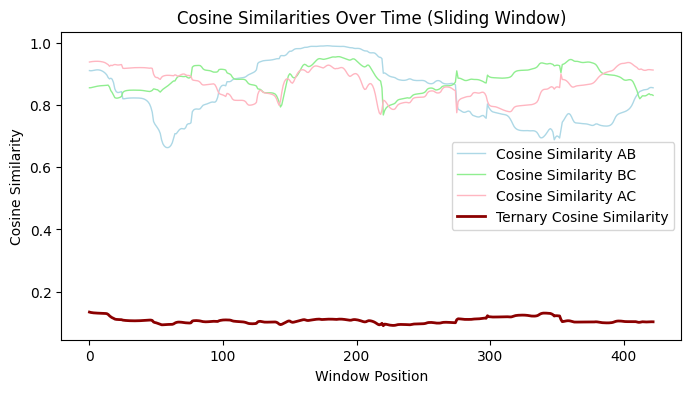

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define the window size
window_size = 78

# Function to calculate cosine similarity
def cosine_similarity(vectorA, vectorB):
    dot_product = np.dot(vectorA, vectorB)
    magnitudeA = np.linalg.norm(vectorA)
    magnitudeB = np.linalg.norm(vectorB)
    if magnitudeA == 0 or magnitudeB == 0:
        return 0
    else:
        return dot_product / (magnitudeA * magnitudeB)

# Function to calculate ternary cosine similarity
def ternary_cosine_similarity(vectorA, vectorB, vectorC):
    unitA = vectorA / np.linalg.norm(vectorA)
    unitB = vectorB / np.linalg.norm(vectorB)
    unitC = vectorC / np.linalg.norm(vectorC)
    ternary_dot_product = np.sum(unitA * unitB * unitC)
    return ternary_dot_product

# Initialize lists to store the results
cos_sim_AB = []
cos_sim_BC = []
cos_sim_AC = []
ternary_cos_sim = []

# Slide the window and compute similarities
for i in range(len(above_median_A) - window_size + 1):
    windowA = speed1[i:i+window_size]
    windowB = speed2[i:i+window_size]
    windowC = speed3[i:i+window_size]

    cos_sim_AB.append(cosine_similarity(windowA, windowB))
    cos_sim_BC.append(cosine_similarity(windowB, windowC))
    cos_sim_AC.append(cosine_similarity(windowA, windowC))
    ternary_cos_sim.append(ternary_cosine_similarity(windowA, windowB, windowC))

# Plotting the results
plt.figure(figsize=(8, 4))

# Plotting the pairwise cosine similarities
plt.plot(cos_sim_AB, color='lightblue', label='Cosine Similarity AB', linewidth=1)
plt.plot(cos_sim_BC, color='lightgreen', label='Cosine Similarity BC', linewidth=1)
plt.plot(cos_sim_AC, color='lightpink', label='Cosine Similarity AC', linewidth=1)

# Plotting the ternary cosine similarity
plt.plot(ternary_cos_sim, color='darkred', label='Ternary Cosine Similarity', linewidth=2)

plt.title('Cosine Similarities Over Time (Sliding Window)')
plt.xlabel('Window Position')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.show()

slightly modified code that replaces NaN's with zero:

[Setting the ternary cosine similarity to zero when one or more vectors in the window have a norm of zero is a reasonable approach:

    Interpretation of Zero Norm:
        A vector with a zero norm (i.e., a vector where all elements are zero) can be thought of as having no direction. In the context of cosine similarity, which measures the cosine of the angle between vectors, a vector with no direction doesn't have a meaningful angle with respect to other vectors.
        Setting the similarity to zero in these cases can be interpreted as indicating no similarity or an undefined similarity, which makes sense if you consider that there's no meaningful way to compare the direction of a "non-existent" vector (zero vector) with any other.

    Continuity in Data Visualization:
        From a data visualization perspective, assigning a value of zero (or any other constant value) to these undefined points creates a continuous plot. This can be helpful for visual analysis, as it avoids gaps that might be misleading or difficult to interpret.

    Mathematical Consistency:
        Mathematically, if any vector in the ternary product is a zero vector, the product of elements in that window would be zero. Thus, setting the ternary cosine similarity to zero in these cases is consistent with the mathematical definition.

    Contextual Considerations:
        It's essential to consider the context of your data and what you're trying to achieve with this analysis. If the occurrence of a zero vector is significant in your context (e.g., it represents a particular state or condition), you might want to handle it differently.]

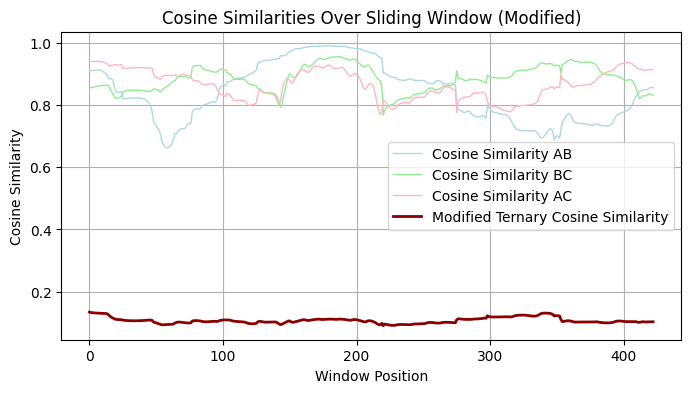

In [45]:
# Function to calculate cosine similarity
def cosine_similarity(vectorA, vectorB):
    dot_product = np.dot(vectorA, vectorB)
    magnitudeA = np.linalg.norm(vectorA)
    magnitudeB = np.linalg.norm(vectorB)
    if magnitudeA == 0 or magnitudeB == 0:
        return 0
    else:
        return dot_product / (magnitudeA * magnitudeB)

# Function to calculate ternary cosine similarity with zero handling
def ternary_cosine_similarity_modified(vectorA, vectorB, vectorC):
    normA = np.linalg.norm(vectorA)
    normB = np.linalg.norm(vectorB)
    normC = np.linalg.norm(vectorC)

    # Check if any of the vectors has a norm of zero
    if normA == 0 or normB == 0 or normC == 0:
        return 0  # Return zero similarity when any vector is a zero vector

    unitA = vectorA / normA
    unitB = vectorB / normB
    unitC = vectorC / normC
    return np.sum(unitA * unitB * unitC)

# Initialize lists to store the results
cos_sim_AB = []
cos_sim_BC = []
cos_sim_AC = []
ternary_cos_sim_modified = []

# Slide the window and compute similarities
for i in range(len(above_median_A) - window_size + 1):
    windowA = speed1[i:i+window_size]
    windowB = speed2[i:i+window_size]
    windowC = speed3[i:i+window_size]

    cos_sim_AB.append(cosine_similarity(windowA, windowB))
    cos_sim_BC.append(cosine_similarity(windowB, windowC))
    cos_sim_AC.append(cosine_similarity(windowA, windowC))
    ternary_cos_sim_modified.append(ternary_cosine_similarity_modified(windowA, windowB, windowC))

# Plotting the results with the modified ternary cosine similarity
plt.figure(figsize=(8, 4))

# Plotting the pairwise cosine similarities
plt.plot(cos_sim_AB, color='lightblue', label='Cosine Similarity AB', linewidth=1)
plt.plot(cos_sim_BC, color='lightgreen', label='Cosine Similarity BC', linewidth=1)
plt.plot(cos_sim_AC, color='lightpink', label='Cosine Similarity AC', linewidth=1)

# Plotting the modified ternary cosine similarity
plt.plot(ternary_cos_sim_modified, color='darkred', label='Modified Ternary Cosine Similarity', linewidth=2)

plt.title('Cosine Similarities Over Sliding Window (Modified)')
plt.xlabel('Window Position')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.grid(True)
plt.show()


And here is the final version that adds an indicator for non-reducible ternary similarity

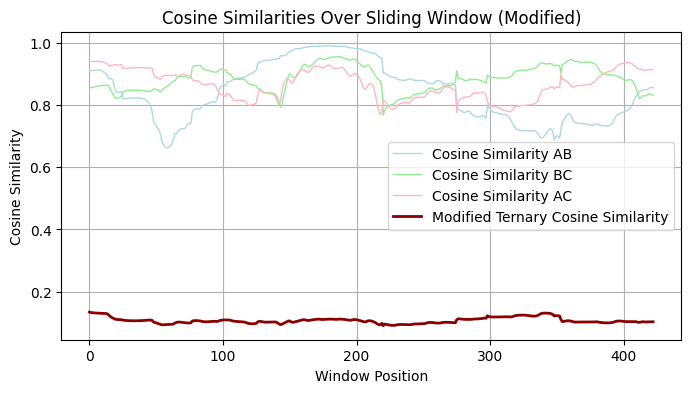

In [46]:
# Creating a new list to store the positions where the ternary cosine similarity is the highest
ternary_highest = []

# Comparing the ternary cosine similarity with other cosine similarities at each window position
for i in range(len(ternary_cos_sim_modified)):
    if ternary_cos_sim_modified[i] > max(cos_sim_AB[i], cos_sim_BC[i], cos_sim_AC[i]):
        ternary_highest.append(1)  # Indicating ternary is highest
    else:
        ternary_highest.append(0)  # Indicating ternary is not highest

# Re-plotting the results with the indication of ternary cosine similarity being the highest
plt.figure(figsize=(8, 4))

# Plotting the pairwise cosine similarities
plt.plot(cos_sim_AB, color='lightblue', label='Cosine Similarity AB', linewidth=1)
plt.plot(cos_sim_BC, color='lightgreen', label='Cosine Similarity BC', linewidth=1)
plt.plot(cos_sim_AC, color='lightpink', label='Cosine Similarity AC', linewidth=1)

# Plotting the modified ternary cosine similarity
plt.plot(ternary_cos_sim_modified, color='darkred', label='Modified Ternary Cosine Similarity', linewidth=2)

# Adding a thick black bar where ternary cosine similarity is the highest
for i, value in enumerate(ternary_highest):
    if value == 1:
        plt.axvline(x=i, color='red', linewidth=3, alpha=0.7)

plt.title('Cosine Similarities Over Sliding Window (Modified)')
plt.xlabel('Window Position')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.grid(True)
plt.show()


# **NOW LET'S ADD CARLO'S ACTUAL TERNARY COSINE SIMILARITY**

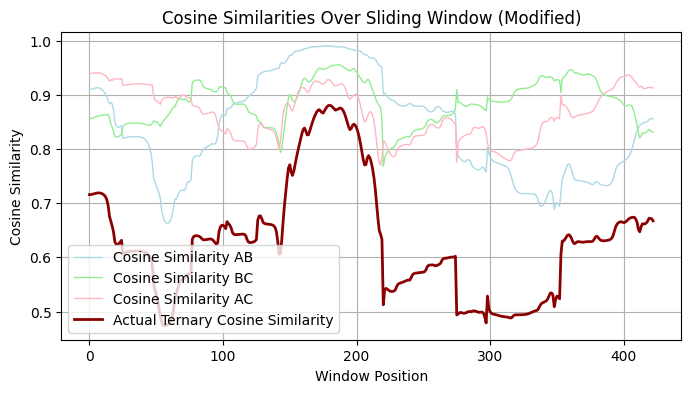

In [47]:
# Function to calculate cosine similarity
def cosine_similarity(vectorA, vectorB):
    dot_product = np.dot(vectorA, vectorB)
    magnitudeA = np.linalg.norm(vectorA)
    magnitudeB = np.linalg.norm(vectorB)
    if magnitudeA == 0 or magnitudeB == 0:
        return 0
    else:
        return dot_product / (magnitudeA * magnitudeB)

# Function to calculate ternary cosine similarity with zero handling
def ternary_cosine_similarity_modified(vectorA, vectorB, vectorC):
    normA = np.linalg.norm(vectorA)
    normB = np.linalg.norm(vectorB)
    normC = np.linalg.norm(vectorC)

    # Check if any of the vectors has a norm of zero
    if normA == 0 or normB == 0 or normC == 0:
        return 0  # Return zero similarity when any vector is a zero vector

    unitA = vectorA / normA
    unitB = vectorB / normB
    unitC = vectorC / normC
    return np.sum(unitA * unitB * unitC)

def dot_product_ternary(vectorA, vectorB, vectorC):
    return sum(a * b * c for a, b, c in zip(vectorA, vectorB, vectorC))

def ternary_norm_cubic(vector):
    return math.pow(abs(dot_product_ternary(vector, vector, vector)), 1/3)

def ternary_cosine_similarity_actual(vectorA, vectorB, vectorC):
    # Calculate ternary norms
    normA = ternary_norm_cubic(vectorA)
    normB = ternary_norm_cubic(vectorB)
    normC = ternary_norm_cubic(vectorC)

    # Check for zero norms to avoid division by zero
    if normA == 0 or normB == 0 or normC == 0:
        return 0

    # Calculate normalized ternary dot product
    normalized_dot = dot_product_ternary(vectorA / normA, vectorB / normB, vectorC / normC)

    return normalized_dot

# Initialize lists to store the results
cos_sim_AB = []
cos_sim_BC = []
cos_sim_AC = []
ternary_cos_sim_modified = []
ternary_cos_sim_actual   = []

# Slide the window and compute similarities
for i in range(len(above_median_A) - window_size + 1):
    windowA = speed1[i:i+window_size]
    windowB = speed2[i:i+window_size]
    windowC = speed3[i:i+window_size]

    cos_sim_AB.append(cosine_similarity(windowA, windowB))
    cos_sim_BC.append(cosine_similarity(windowB, windowC))
    cos_sim_AC.append(cosine_similarity(windowA, windowC))
    ternary_cos_sim_modified.append(ternary_cosine_similarity_modified(windowA, windowB, windowC))
    ternary_cos_sim_actual.append(ternary_cosine_similarity_actual(windowA, windowB, windowC))


# Plotting the results
plt.figure(figsize=(8, 4))

# Plotting the pairwise cosine similarities
plt.plot(cos_sim_AB, color='lightblue', label='Cosine Similarity AB', linewidth=1)
plt.plot(cos_sim_BC, color='lightgreen', label='Cosine Similarity BC', linewidth=1)
plt.plot(cos_sim_AC, color='lightpink', label='Cosine Similarity AC', linewidth=1)
# Plotting the modified ternary cosine similarity
plt.plot(ternary_cos_sim_actual, color='darkred', label='Actual Ternary Cosine Similarity', linewidth=2)
# Adding a thick black bar where ternary cosine similarity is the highest
ternary_highest = []
for i in range(len(ternary_cos_sim_modified)):
    if ternary_cos_sim_modified[i] > max(cos_sim_AB[i], cos_sim_BC[i], cos_sim_AC[i]):
        ternary_highest.append(1)  # Indicating ternary is highest
    else:
        ternary_highest.append(0)  # Indicating ternary is not highest
for i, value in enumerate(ternary_highest):
    if value == 1:
        plt.axvline(x=i, color='red', linewidth=3, alpha=0.7)

plt.title('Cosine Similarities Over Sliding Window (Modified)')
plt.xlabel('Window Position')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.grid(True)
plt.show()

## STAIRCASE OF VELOCITIES

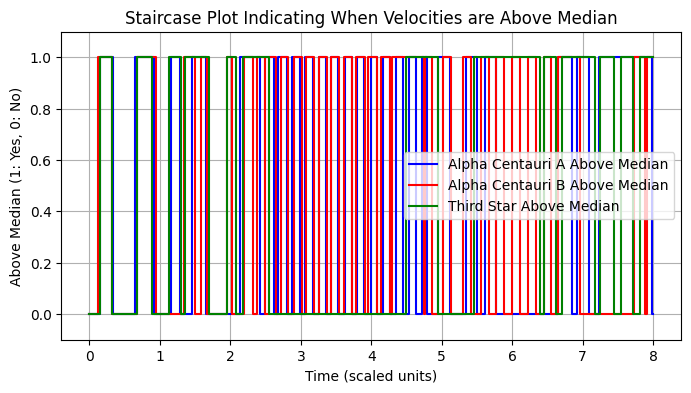

In [48]:
# Creating a staircase plot to indicate when velocities are above or below the median for each star
above_median_A = np.where(speed1 > median_velocity_A, 1, 0)
above_median_B = np.where(speed2 > median_velocity_B, 1, 0)
above_median_3 = np.where(speed3 > median_velocity_3, 1, 0)

# Plotting
plt.figure(figsize=(8, 4))

# Staircase plot for Alpha Centauri A
plt.step(time_span, above_median_A, label="Alpha Centauri A Above Median", color='blue')

# Staircase plot for Alpha Centauri B
plt.step(time_span, above_median_B, label="Alpha Centauri B Above Median", color='red')

# Staircase plot for the Third Star
plt.step(time_span, above_median_3, label="Third Star Above Median", color='green')

plt.title("Staircase Plot Indicating When Velocities are Above Median")
plt.xlabel("Time (scaled units)")
plt.ylabel("Above Median (1: Yes, 0: No)")
plt.ylim(-0.1, 1.1)  # Set y limits to clearly show 0 and 1
plt.legend()
plt.grid(True)
plt.show()


# VELOCITY STATE HISTOGRAM

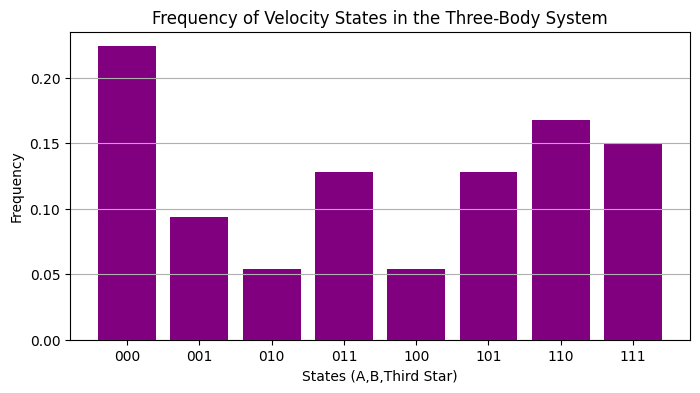

In [49]:
# Combining the states of all three stars to determine the possible system states
combined_states = above_median_A * 4 + above_median_B * 2 + above_median_3

# Counting the occurrences of each state
state_counts = np.bincount(combined_states, minlength=8)

# Calculating the frequency of each state
state_frequencies = state_counts / len(combined_states)

# State labels (from '000' to '111')
state_labels = [format(i, '03b') for i in range(8)]

# Plotting histogram of state frequencies
plt.figure(figsize=(8, 4))
plt.bar(state_labels, state_frequencies, color='purple')
plt.title("Frequency of Velocity States in the Three-Body System")
plt.xlabel("States (A,B,Third Star)")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()


# VELOCITY TPM

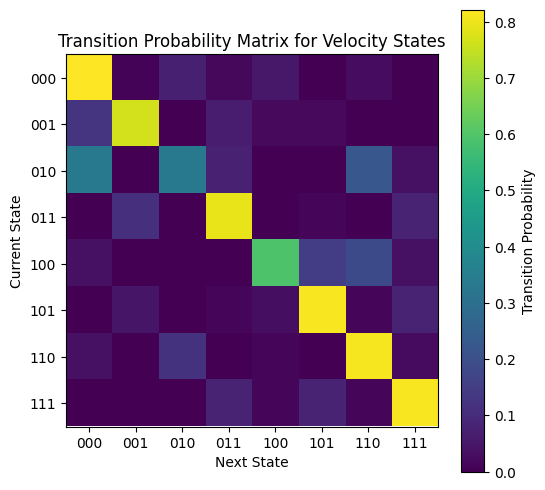

In [50]:
# Function to calculate transition probabilities between states for the three-body system
def calculate_transition_probabilities(states, num_states):
    # Initialize transition matrix
    transition_matrix = np.zeros((num_states, num_states))

    # Count transitions
    for (current, next_) in zip(states[:-1], states[1:]):
        transition_matrix[current, next_] += 1

    # Normalize each row to get probabilities
    row_sums = transition_matrix.sum(axis=1, keepdims=True)
    normalized_transition_matrix = transition_matrix / row_sums

    return normalized_transition_matrix

# Number of unique states for the three-body system (2^3 = 8)
num_states = 8

# Calculate the transition probabilities
transition_probabilities = calculate_transition_probabilities(combined_states, num_states)

# Plotting the transition matrix as a heatmap
plt.figure(figsize=(6, 6))
plt.imshow(transition_probabilities, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Transition Probability')
plt.xticks(range(num_states), state_labels)
plt.yticks(range(num_states), state_labels)
plt.title('Transition Probability Matrix for Velocity States')
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.show()


In [51]:
# Define units
unit_labels = ["A", "B", "C"]
n_units = len(unit_labels) # 3 units

In [52]:
sbstpm = transition_probabilities

In [53]:
print(sbstpm)

[[0.82142857 0.00892857 0.07142857 0.01785714 0.05357143 0.
  0.02678571 0.        ]
 [0.12765957 0.76595745 0.         0.06382979 0.0212766  0.0212766
  0.         0.        ]
 [0.33333333 0.         0.33333333 0.07407407 0.         0.
  0.22222222 0.03703704]
 [0.         0.11111111 0.         0.79365079 0.         0.01587302
  0.         0.07936508]
 [0.03703704 0.         0.         0.         0.59259259 0.14814815
  0.18518519 0.03703704]
 [0.         0.046875   0.         0.015625   0.03125    0.8125
  0.015625   0.078125  ]
 [0.03571429 0.         0.11904762 0.         0.01190476 0.
  0.80952381 0.02380952]
 [0.         0.         0.         0.08       0.01333333 0.08
  0.01333333 0.81333333]]


In [54]:
tpm = pyphi.convert.sbs2sbn(sbstpm)

{0: (0, 0, 0), 1: (1, 0, 0), 2: (0, 1, 0), 3: (1, 1, 0), 4: (0, 0, 1), 5: (1, 0, 1), 6: (0, 1, 1), 7: (1, 1, 1)}


In [55]:
pyPhiInput = tpm
labels = ('A','B','C')

In [56]:
network = pyphi.Network(pyPhiInput, node_labels=labels)
node_indices = (0,1,2)

In [57]:
state = (1,1,1)

In [58]:
candidate_system = pyphi.Subsystem(network, state, node_indices)

In [59]:
phi_structure = pyphi.new_big_phi.phi_structure(candidate_system)
big_phi = phi_structure.big_phi

In [60]:
fig = visualize.phi_structure.plot_phi_structure(phi_structure,subsystem=candidate_system)
fig.show()

# **PLOT PHI OVER TIME ! (by tracking states and their PHI)**

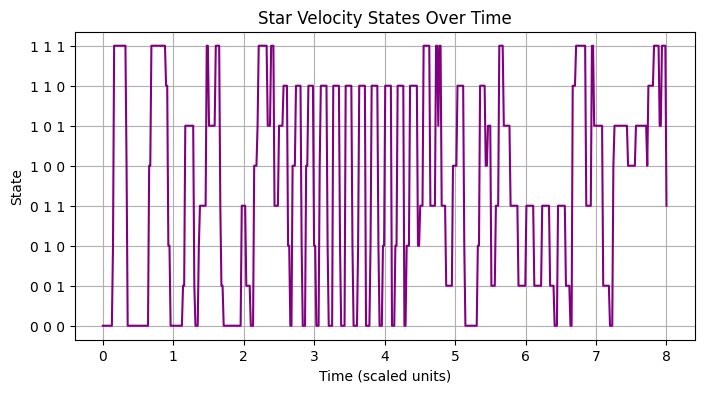

In [61]:
# Combine into a single matrix
combined_flags = np.vstack((above_median_A, above_median_B, above_median_3)).T

# Convert to string representation
state_codes = [''.join(map(str, row)) for row in combined_flags]

# Assign each unique state a new numeric value
unique_states = sorted(set(state_codes))
state_to_numeric = {state: i for i, state in enumerate(unique_states)}

# Convert state codes to their numeric values
numeric_values = [state_to_numeric[state] for state in state_codes]

# Create a mapping of numeric_values to 3-bit states
state_labels = [" ".join(map(str, state)) for state in state_codes]
value_to_state = dict(zip(numeric_values, state_labels))

# Plot the numeric values as a function of time
plt.figure(figsize=(8, 4))
plt.plot(time_span, numeric_values, linestyle='-', color='purple')
# Set custom y-axis labels
plt.yticks(list(value_to_state.keys()), list(value_to_state.values()))
plt.title("Star Velocity States Over Time")
plt.xlabel("Time (scaled units)")
plt.ylabel("State")
plt.grid(True)
plt.show()

**adopt some parts from Pax' code on how to extract all PHI values**

In [62]:
# Define the number of bits
num_bits = len(labels)
# Generate all possible combinations of n-bit binary numbers
possible_states = np.array(list(itertools.product([0, 1], repeat=num_bits)))

# set up PyPhi
pyPhiInput = tpm
labels = ('A','B','C')

# create network
network = pyphi.Network(pyPhiInput, node_labels=labels)
node_indices = (0,1,2)
states = possible_states

# Define an array to store the phi values for each state
phi_values = np.zeros(len(states))
num_possible_states = len(possible_states)
phi_states = np.zeros((num_possible_states, 3), dtype=int)

# Define variables to store the maximum phi value and its corresponding state
max_phi = -np.inf
max_phi_state = None
# Initialize a list to store mechanisms for each state
phi_mechanisms = []

# Loop through each possible state
for i, state in enumerate(states):
    # Create the candidate subsystem
    candidate_system = pyphi.Subsystem(network, state, node_indices)

    # Compute the big phi value for the candidate subsystem
    phi_structure = pyphi.new_big_phi.phi_structure(candidate_system)
    big_phi = phi_structure.big_phi

    # Store the big phi value in the array
    phi_values[i] = big_phi
    # Store the associated state
    phi_states[i] = state
    # Extract mechanisms from distinctions and store them for the current state
    current_state_mechanisms = [distinction.mechanism for distinction in phi_structure.distinctions]
    phi_mechanisms.append(current_state_mechanisms)

    # Update the maximum big phi value and its corresponding state if necessary
    if big_phi > max_phi:
        max_phi = big_phi
        max_phi_state = state

print("Maximum big phi value:", max_phi)
print("State with maximum big phi value:", max_phi_state)

Maximum big phi value: 5.791377763931001
State with maximum big phi value: [0 0 0]


**Now, let's create the graph**:
# PHI AS A FUNCTION OF TIME

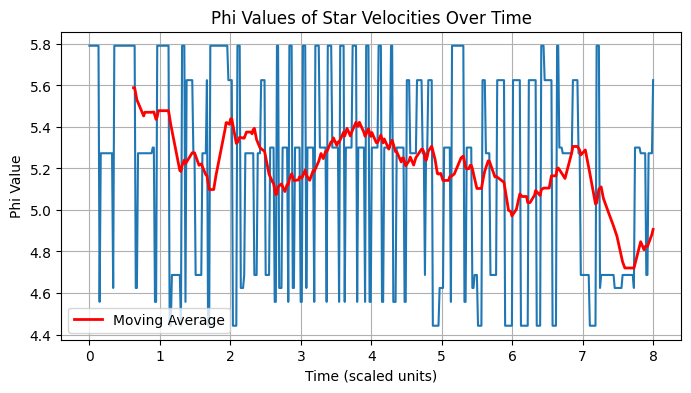

In [63]:
# Assuming above_median_A, above_median_B, and above_median_3 are defined as before
# Combine the states into a single array
combined_states = np.array([above_median_A, above_median_B, above_median_3]).T  # Transpose to get the correct shape

####### THIS MIGHT BE AN ERROR -> DOUBLE CHECK THAT THIS IS THE STATE SERIES INDEED

# Map each state to the corresponding phi_value
phi_values_mapped = np.array([phi_values[np.where(np.all(phi_states == state, axis=1))[0][0]] for state in combined_states])

# Calculate a moving average
window_size = 40
moving_avg = np.convolve(phi_values_mapped, np.ones(window_size)/window_size, mode='valid')

# Extend the time_span to match the length of the moving average array
extended_time_span = time_span[window_size - 1:]

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(time_span, phi_values_mapped, linestyle='-')
plt.plot(extended_time_span, moving_avg, linestyle='-', color='red', linewidth=2, label="Moving Average")
plt.title("Phi Values of Star Velocities Over Time")
plt.xlabel("Time (scaled units)")
plt.ylabel("Phi Value")
plt.legend()
plt.grid(True)
plt.show()

# **Plot MECHANISMS as a function of time**

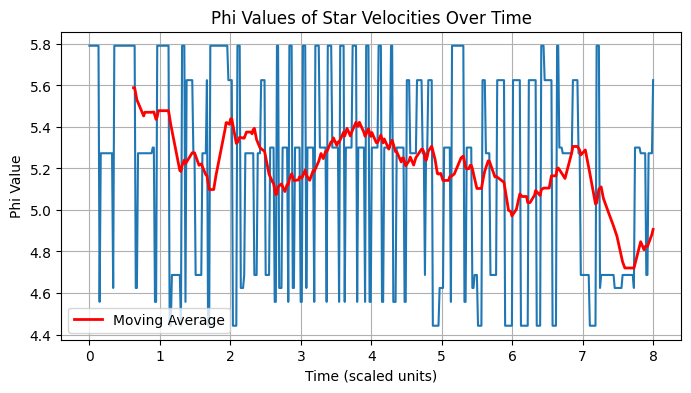

In [64]:
# Assuming above_median_A, above_median_B, and above_median_3 are defined as before
# Combine the states into a single array
combined_states = np.array([above_median_A, above_median_B, above_median_3]).T  # Transpose to get the correct shape

# Map each state to the corresponding phi_value
phi_values_mapped = np.array([phi_values[np.where(np.all(phi_states == state, axis=1))[0][0]] for state in combined_states])

# Calculate a moving average
window_size = 40
moving_avg = np.convolve(phi_values_mapped, np.ones(window_size)/window_size, mode='valid')

# Extend the time_span to match the length of the moving average array
extended_time_span = time_span[window_size - 1:]

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(time_span, phi_values_mapped, linestyle='-')
plt.plot(extended_time_span, moving_avg, linestyle='-', color='red', linewidth=2, label="Moving Average")
plt.title("Phi Values of Star Velocities Over Time")
plt.xlabel("Time (scaled units)")
plt.ylabel("Phi Value")
plt.legend()
plt.grid(True)
plt.show()

# **NOW MECHANISMS OVER TIME!**

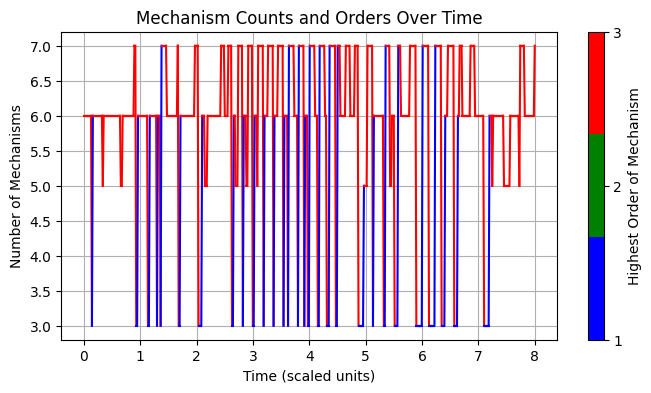

In [65]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np

# Combine the states into a single array
combined_states = np.array([above_median_A, above_median_B, above_median_3]).T
# Map each state to the corresponding mechanisms
phi_mechanisms_mapped = np.array([phi_mechanisms[np.where(np.all(phi_states == state, axis=1))[0][0]] for state in combined_states], dtype=object)

# Function to determine the highest order of mechanism
def highest_order(mechanisms):
    return max(len(m) for m in mechanisms)

# Prepare data for plot
mechanism_counts = [len(mech) for mech in phi_mechanisms_mapped]
highest_orders = [highest_order(mech) for mech in phi_mechanisms_mapped]
max_order = max(highest_orders)

# Define a custom colormap (modify these colors as needed)
colors = ['blue', 'green', 'red']  # For orders 1, 2, 3, ...
cmap = mcolors.ListedColormap(colors[:max_order])

# Normalize highest order for color mapping
norm = plt.Normalize(1, max_order)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

# Plotting
for i in range(len(time_span) - 1):
    color_index = highest_orders[i] - 1  # Adjust index for 0-based color list
    ax.plot(time_span[i:i+2], mechanism_counts[i:i+2], color=colors[color_index], linestyle='-')

# Create the discrete colorbar
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, ticks=range(1, max_order + 1))
cbar.set_label('Highest Order of Mechanism')

ax.set_title("Mechanism Counts and Orders Over Time")
ax.set_xlabel("Time (scaled units)")
ax.set_ylabel("Number of Mechanisms")
ax.grid(True)
plt.show()

**with moving averages**

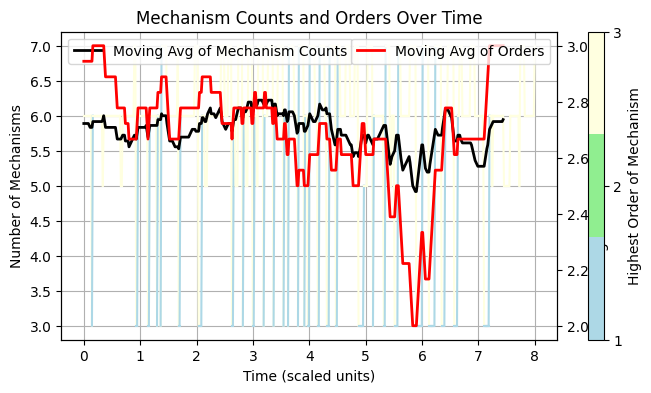

In [66]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np

# Function to determine the highest order of mechanism
def highest_order(mechanisms):
    return max(len(m) for m in mechanisms)

# Prepare data for plot
mechanism_counts = [len(mech) for mech in phi_mechanisms_mapped]
highest_orders = [highest_order(mech) for mech in phi_mechanisms_mapped]
max_order = max(highest_orders)

# Define a custom colormap
colors = ['lightblue', 'lightgreen', 'lightyellow']  # For orders 1, 2, 3, ...
cmap = mcolors.ListedColormap(colors[:max_order])

# Normalize highest order for color mapping
norm = plt.Normalize(1, max_order)

# Calculate moving averages
window_size = 36  # Adjust window size as needed
moving_avg_mechanism_counts = np.convolve(mechanism_counts, np.ones(window_size)/window_size, mode='valid')
moving_avg_highest_orders = np.convolve(highest_orders, np.ones(window_size)/window_size, mode='valid')

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plotting mechanisms and their orders
for i in range(len(time_span) - 1):
    color_index = highest_orders[i] - 1
    ax1.plot(time_span[i:i+2], mechanism_counts[i:i+2], color=colors[color_index], linestyle='-')

# Plotting moving average of mechanism counts
ax1.plot(time_span[:len(moving_avg_mechanism_counts)], moving_avg_mechanism_counts, color='black', linewidth=2, label='Moving Avg of Mechanism Counts')

# Set up secondary y-axis for moving average of orders
ax2 = ax1.twinx()
ax2.plot(time_span[:len(moving_avg_highest_orders)], moving_avg_highest_orders, color='red', linewidth=2, label='Moving Avg of Orders')

# Create the discrete colorbar
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax1, ticks=range(1, max_order + 1))
cbar.set_label('Highest Order of Mechanism')

# Set labels and titles
ax1.set_title("Mechanism Counts and Orders Over Time")
ax1.set_xlabel("Time (scaled units)")
ax1.set_ylabel("Number of Mechanisms")
ax2.set_ylabel("Average Order of Mechanisms")
ax1.grid(True)

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

**combining number and order into a singular measure**

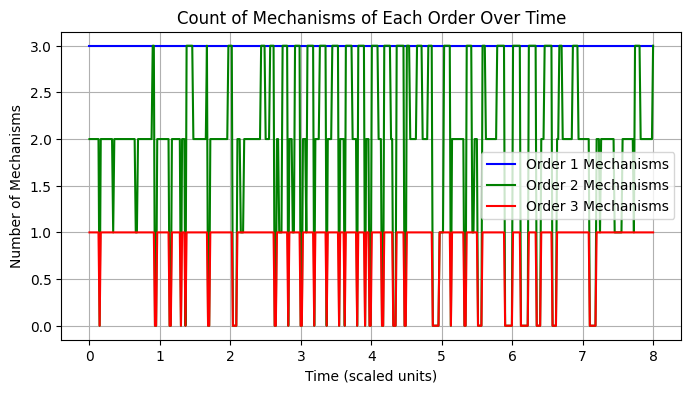

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize counts for each order
count_order_1 = []
count_order_2 = []
count_order_3 = []

# Count mechanisms of each order for each time point
for mechanisms in phi_mechanisms_mapped:
    order_1 = sum(1 for mech in mechanisms if len(mech) == 1)
    order_2 = sum(1 for mech in mechanisms if len(mech) == 2)
    order_3 = sum(1 for mech in mechanisms if len(mech) == 3)

    count_order_1.append(order_1)
    count_order_2.append(order_2)
    count_order_3.append(order_3)

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(time_span, count_order_1, label='Order 1 Mechanisms', color='blue')
plt.plot(time_span, count_order_2, label='Order 2 Mechanisms', color='green')
plt.plot(time_span, count_order_3, label='Order 3 Mechanisms', color='red')

plt.title('Count of Mechanisms of Each Order Over Time')
plt.xlabel('Time (scaled units)')
plt.ylabel('Number of Mechanisms')
plt.legend()
plt.grid(True)
plt.show()

**candidate measures**

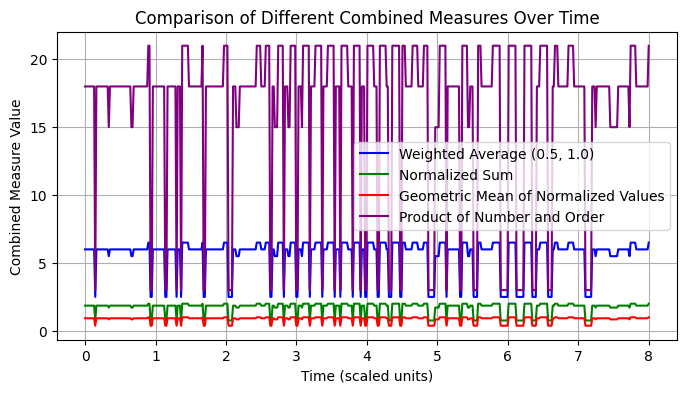

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate normalized values
def normalize(values):
    return [float(v) / max(values) for v in values]

# Prepare the data
number_of_mechanisms = [len(mech) for mech in phi_mechanisms_mapped]
highest_order = [highest_order(mech) for mech in phi_mechanisms_mapped]
normalized_mechanisms = normalize(number_of_mechanisms)
normalized_order = normalize(highest_order)

# Calculate different measures
weighted_average = [0.5 * num + 1.0 * order for num, order in zip(number_of_mechanisms, highest_order)]
normalized_sum = [num + order for num, order in zip(normalized_mechanisms, normalized_order)]
geometric_mean = [np.sqrt(num * order) for num, order in zip(normalized_mechanisms, normalized_order)]
product = [num * order for num, order in zip(number_of_mechanisms, highest_order)]

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(time_span, weighted_average, label='Weighted Average (0.5, 1.0)', color='blue')
plt.plot(time_span, normalized_sum, label='Normalized Sum', color='green')
plt.plot(time_span, geometric_mean, label='Geometric Mean of Normalized Values', color='red')
plt.plot(time_span, product, label='Product of Number and Order', color='purple')

plt.title('Comparison of Different Combined Measures Over Time')
plt.xlabel('Time (scaled units)')
plt.ylabel('Combined Measure Value')
plt.legend()
plt.grid(True)
plt.show()

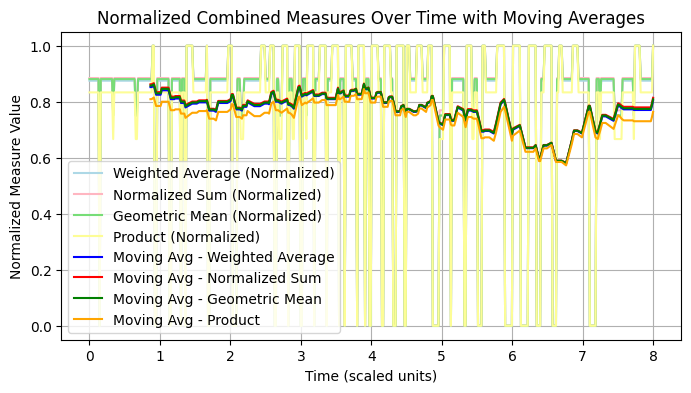

In [69]:
import matplotlib.pyplot as plt
import numpy as np

def normalize(values):
    min_val, max_val = min(values), max(values)
    return [(v - min_val) / (max_val - min_val) for v in values]

# Calculate the moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

window_size = 55  # Define the window size for moving average

# Calculate each measure and normalize
weighted_avg = normalize([0.5 * num + 1.0 * order for num, order in zip(number_of_mechanisms, highest_order)])
norm_sum = normalize([num + order for num, order in zip(normalized_mechanisms, normalized_order)])
geom_mean = normalize([np.sqrt(num * order) for num, order in zip(normalized_mechanisms, normalized_order)])
product = normalize([num * order for num, order in zip(number_of_mechanisms, highest_order)])

# Calculate moving averages for each measure
weighted_avg_ma = moving_average(weighted_avg, window_size)
norm_sum_ma = moving_average(norm_sum, window_size)
geom_mean_ma = moving_average(geom_mean, window_size)
product_ma = moving_average(product, window_size)

# Adjusted time span for moving averages
adjusted_time_span = time_span[window_size - 1:]

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(time_span, weighted_avg, label='Weighted Average (Normalized)', color='#add8e6')  # Light blue
plt.plot(time_span, norm_sum, label='Normalized Sum (Normalized)', color='#ffb6c1')  # Light pink
plt.plot(time_span, geom_mean, label='Geometric Mean (Normalized)', color='#77dd77')  # Light green
plt.plot(time_span, product, label='Product (Normalized)', color='#fdfd96')  # Light yellow

# Plot moving averages
plt.plot(adjusted_time_span, weighted_avg_ma, color='blue', label='Moving Avg - Weighted Average')
plt.plot(adjusted_time_span, norm_sum_ma, color='red', label='Moving Avg - Normalized Sum')
plt.plot(adjusted_time_span, geom_mean_ma, color='green', label='Moving Avg - Geometric Mean')
plt.plot(adjusted_time_span, product_ma, color='orange', label='Moving Avg - Product')

plt.title('Normalized Combined Measures Over Time with Moving Averages')
plt.xlabel('Time (scaled units)')
plt.ylabel('Normalized Measure Value')
plt.legend()
plt.grid(True)
plt.show()